In [2]:
#importing librarirees
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import seaborn as sns
import plotly.express as px
from sklearn.impute import SimpleImputer
import requests
import openmeteo_requests
import requests_cache
from retry_requests import retry

`Open meteo` provides us with the code for exracting data from their API. The code is implemented below

In [4]:

# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after = -1)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)

# Make sure all required weather variables are listed here
# The order of variables in hourly or daily is important to assign them correctly below
url = "https://archive-api.open-meteo.com/v1/archive"
params = {
	"latitude": 52.52,
	"longitude": 13.41,
	"start_date": "2021-03-01",
	"end_date": "2025-03-04",
	"hourly": ["temperature_2m", "relative_humidity_2m", "dew_point_2m", "apparent_temperature", "precipitation", "rain", "snowfall", "snow_depth", "weather_code", "pressure_msl", "surface_pressure", "cloud_cover", "cloud_cover_low", "cloud_cover_mid", "cloud_cover_high", "et0_fao_evapotranspiration", "vapour_pressure_deficit", "wind_speed_10m", "wind_speed_100m", "wind_direction_10m", "wind_direction_100m", "wind_gusts_10m", "soil_temperature_0_to_7cm", "soil_temperature_7_to_28cm", "soil_temperature_28_to_100cm", "soil_temperature_100_to_255cm", "soil_moisture_0_to_7cm", "soil_moisture_7_to_28cm", "soil_moisture_28_to_100cm", "soil_moisture_100_to_255cm"]
}
responses = openmeteo.weather_api(url, params=params)

# Process first location. Add a for-loop for multiple locations or weather models
response = responses[0]
print(f"Coordinates {response.Latitude()}°N {response.Longitude()}°E")
print(f"Elevation {response.Elevation()} m asl")
print(f"Timezone {response.Timezone()} {response.TimezoneAbbreviation()}")
print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")

# Process hourly data. The order of variables needs to be the same as requested.
hourly = response.Hourly()
hourly_temperature_2m = hourly.Variables(0).ValuesAsNumpy()
hourly_relative_humidity_2m = hourly.Variables(1).ValuesAsNumpy()
hourly_dew_point_2m = hourly.Variables(2).ValuesAsNumpy()
hourly_apparent_temperature = hourly.Variables(3).ValuesAsNumpy()
hourly_precipitation = hourly.Variables(4).ValuesAsNumpy()
hourly_rain = hourly.Variables(5).ValuesAsNumpy()
hourly_snowfall = hourly.Variables(6).ValuesAsNumpy()
hourly_snow_depth = hourly.Variables(7).ValuesAsNumpy()
hourly_weather_code = hourly.Variables(8).ValuesAsNumpy()
hourly_pressure_msl = hourly.Variables(9).ValuesAsNumpy()
hourly_surface_pressure = hourly.Variables(10).ValuesAsNumpy()
hourly_cloud_cover = hourly.Variables(11).ValuesAsNumpy()
hourly_cloud_cover_low = hourly.Variables(12).ValuesAsNumpy()
hourly_cloud_cover_mid = hourly.Variables(13).ValuesAsNumpy()
hourly_cloud_cover_high = hourly.Variables(14).ValuesAsNumpy()
hourly_et0_fao_evapotranspiration = hourly.Variables(15).ValuesAsNumpy()
hourly_vapour_pressure_deficit = hourly.Variables(16).ValuesAsNumpy()
hourly_wind_speed_10m = hourly.Variables(17).ValuesAsNumpy()
hourly_wind_speed_100m = hourly.Variables(18).ValuesAsNumpy()
hourly_wind_direction_10m = hourly.Variables(19).ValuesAsNumpy()
hourly_wind_direction_100m = hourly.Variables(20).ValuesAsNumpy()
hourly_wind_gusts_10m = hourly.Variables(21).ValuesAsNumpy()
hourly_soil_temperature_0_to_7cm = hourly.Variables(22).ValuesAsNumpy()
hourly_soil_temperature_7_to_28cm = hourly.Variables(23).ValuesAsNumpy()
hourly_soil_temperature_28_to_100cm = hourly.Variables(24).ValuesAsNumpy()
hourly_soil_temperature_100_to_255cm = hourly.Variables(25).ValuesAsNumpy()
hourly_soil_moisture_0_to_7cm = hourly.Variables(26).ValuesAsNumpy()
hourly_soil_moisture_7_to_28cm = hourly.Variables(27).ValuesAsNumpy()
hourly_soil_moisture_28_to_100cm = hourly.Variables(28).ValuesAsNumpy()
hourly_soil_moisture_100_to_255cm = hourly.Variables(29).ValuesAsNumpy()

hourly_data = {"date": pd.date_range(
	start = pd.to_datetime(hourly.Time(), unit = "s", utc = True),
	end = pd.to_datetime(hourly.TimeEnd(), unit = "s", utc = True),
	freq = pd.Timedelta(seconds = hourly.Interval()),
	inclusive = "left"
)}

hourly_data["temperature_2m"] = hourly_temperature_2m
hourly_data["relative_humidity_2m"] = hourly_relative_humidity_2m
hourly_data["dew_point_2m"] = hourly_dew_point_2m
hourly_data["apparent_temperature"] = hourly_apparent_temperature
hourly_data["precipitation"] = hourly_precipitation
hourly_data["rain"] = hourly_rain
hourly_data["snowfall"] = hourly_snowfall
hourly_data["snow_depth"] = hourly_snow_depth
hourly_data["weather_code"] = hourly_weather_code
hourly_data["pressure_msl"] = hourly_pressure_msl
hourly_data["surface_pressure"] = hourly_surface_pressure
hourly_data["cloud_cover"] = hourly_cloud_cover
hourly_data["cloud_cover_low"] = hourly_cloud_cover_low
hourly_data["cloud_cover_mid"] = hourly_cloud_cover_mid
hourly_data["cloud_cover_high"] = hourly_cloud_cover_high
hourly_data["et0_fao_evapotranspiration"] = hourly_et0_fao_evapotranspiration
hourly_data["vapour_pressure_deficit"] = hourly_vapour_pressure_deficit
hourly_data["wind_speed_10m"] = hourly_wind_speed_10m
hourly_data["wind_speed_100m"] = hourly_wind_speed_100m
hourly_data["wind_direction_10m"] = hourly_wind_direction_10m
hourly_data["wind_direction_100m"] = hourly_wind_direction_100m
hourly_data["wind_gusts_10m"] = hourly_wind_gusts_10m
hourly_data["soil_temperature_0_to_7cm"] = hourly_soil_temperature_0_to_7cm
hourly_data["soil_temperature_7_to_28cm"] = hourly_soil_temperature_7_to_28cm
hourly_data["soil_temperature_28_to_100cm"] = hourly_soil_temperature_28_to_100cm
hourly_data["soil_temperature_100_to_255cm"] = hourly_soil_temperature_100_to_255cm
hourly_data["soil_moisture_0_to_7cm"] = hourly_soil_moisture_0_to_7cm
hourly_data["soil_moisture_7_to_28cm"] = hourly_soil_moisture_7_to_28cm
hourly_data["soil_moisture_28_to_100cm"] = hourly_soil_moisture_28_to_100cm
hourly_data["soil_moisture_100_to_255cm"] = hourly_soil_moisture_100_to_255cm

hourly_dataframe = pd.DataFrame(data = hourly_data)
#first five rows
hourly_dataframe.head()

Coordinates 52.5483283996582°N 13.407821655273438°E
Elevation 38.0 m asl
Timezone None None
Timezone difference to GMT+0 0 s


date  temperature_2m  relative_humidity_2m  \
0 2021-03-01 00:00:00+00:00          3.4585             92.177605   
1 2021-03-01 01:00:00+00:00          3.1085             94.148003   
2 2021-03-01 02:00:00+00:00          3.0585             94.481461   
3 2021-03-01 03:00:00+00:00          3.0085             94.816238   
4 2021-03-01 04:00:00+00:00          2.9085             95.489784   

   dew_point_2m  apparent_temperature  precipitation  rain  snowfall  \
0        2.3085              0.800352            0.0   0.0       0.0   
1        2.2585              0.441361            0.0   0.0       0.0   
2        2.2585              0.185902            0.0   0.0       0.0   
3        2.2585              0.084275            0.0   0.0       0.0   
4        2.2585             -0.003949            0.0   0.0       0.0   

   snow_depth  weather_code  ...  wind_direction_100m  wind_gusts_10m  \
0         0.0           3.0  ...           276.008911        9.360000   
1         0.0           2.0  ...           263.991089       10.440001   
2         0.0           3.0  ...           264.805664       12.959999   
3         0.0           3.0  ...           264.920471       13.679999   
4         0.0           3.0  ...           259.695221       13.679999   

   soil_temperature_0_to_7cm  soil_temperature_7_to_28cm  \
0                     3.4085                      4.8085   
1                     3.5085                      4.7085   
2                     3.5585                      4.6085   
3                     3.5585                      4.5585   
4                     3.5585                      4.5085   

   soil_temperature_28_to_100cm  soil_temperature_100_to_255cm  \
0                        4.8085                         5.1585   
1                        4.8085                         5.1585   
2                        4.8085                         5.1585   
3                        4.8085                         5.1585   
4                        4.8085                         5.1585   

   soil_moisture_0_to_7cm  soil_moisture_7_to_28cm  soil_moisture_28_to_100cm  \
0                   0.359                    0.359                      0.345   
1                   0.359                    0.359                      0.345   
2                   0.359                    0.359                      0.345   
3                   0.359                    0.359                      0.345   
4                   0.358                    0.359                      0.345   

   soil_moisture_100_to_255cm  
0                       0.254  
1                       0.254  
2                       0.254  
3                       0.254  
4                       0.254  

[5 rows x 31 columns]

In [5]:
#dataframe structure
hourly_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35160 entries, 0 to 35159
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   date                           35160 non-null  datetime64[ns, UTC]
 1   temperature_2m                 35160 non-null  float32            
 2   relative_humidity_2m           35160 non-null  float32            
 3   dew_point_2m                   35160 non-null  float32            
 4   apparent_temperature           35160 non-null  float32            
 5   precipitation                  35160 non-null  float32            
 6   rain                           35160 non-null  float32            
 7   snowfall                       35160 non-null  float32            
 8   snow_depth                     34560 non-null  float32            
 9   weather_code                   35160 non-null  float32            
 10  pressure_msl          

# 1. EXPLORATORY DATA ANALYSIS

### 1.1 DEALING WITH NULL VALUES

In [6]:
#check for null values
hourly_dataframe.isna().sum()

date                               0
temperature_2m                     0
relative_humidity_2m               0
dew_point_2m                       0
apparent_temperature               0
precipitation                      0
rain                               0
snowfall                           0
snow_depth                       600
weather_code                       0
pressure_msl                       0
surface_pressure                   0
cloud_cover                        0
cloud_cover_low                    0
cloud_cover_mid                    0
cloud_cover_high                   0
et0_fao_evapotranspiration         0
vapour_pressure_deficit            0
wind_speed_10m                     0
wind_speed_100m                    0
wind_direction_10m                 0
wind_direction_100m                0
wind_gusts_10m                     0
soil_temperature_0_to_7cm          0
soil_temperature_7_to_28cm         0
soil_temperature_28_to_100cm       0
soil_temperature_100_to_255cm      0
s

Looking at the output above, we can see most columns are missing `47` records which is almost `0.13` of the total records except for `snow_depth` which has `648` records missing. Although the number of missing records is not that significant, we can not drop the rows with missing values since we might end up loosing more data. Since our data is continous and numerical we will use the `mean` imputation method to fill the missing values. We will use the `SimpleImputer` from the `sklearn.impute` module to do this.

In [7]:
#instantiate the imputer
imputer = SimpleImputer(strategy= "mean")
#split date
date = hourly_dataframe["date"]
#getting numerical columns
num_cols = hourly_dataframe.drop(columns= "date")
#imputting the missing values
imputed_data= pd.DataFrame(imputer.fit_transform(num_cols), columns=num_cols.columns)
#concatenate the imputed data with the date column
weather_data = pd.concat([date, imputed_data], axis=1)
#info of the dataframe
weather_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35160 entries, 0 to 35159
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   date                           35160 non-null  datetime64[ns, UTC]
 1   temperature_2m                 35160 non-null  float32            
 2   relative_humidity_2m           35160 non-null  float32            
 3   dew_point_2m                   35160 non-null  float32            
 4   apparent_temperature           35160 non-null  float32            
 5   precipitation                  35160 non-null  float32            
 6   rain                           35160 non-null  float32            
 7   snowfall                       35160 non-null  float32            
 8   snow_depth                     35160 non-null  float32            
 9   weather_code                   35160 non-null  float32            
 10  pressure_msl          

In [8]:
#checking for null values
weather_data.isna().sum()

date                             0
temperature_2m                   0
relative_humidity_2m             0
dew_point_2m                     0
apparent_temperature             0
precipitation                    0
rain                             0
snowfall                         0
snow_depth                       0
weather_code                     0
pressure_msl                     0
surface_pressure                 0
cloud_cover                      0
cloud_cover_low                  0
cloud_cover_mid                  0
cloud_cover_high                 0
et0_fao_evapotranspiration       0
vapour_pressure_deficit          0
wind_speed_10m                   0
wind_speed_100m                  0
wind_direction_10m               0
wind_direction_100m              0
wind_gusts_10m                   0
soil_temperature_0_to_7cm        0
soil_temperature_7_to_28cm       0
soil_temperature_28_to_100cm     0
soil_temperature_100_to_255cm    0
soil_moisture_0_to_7cm           0
soil_moisture_7_to_2

With the missing data points delt with, we can look at the duplicates
### 1.2 DUPLICATES

In [9]:
weather_data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
35155    False
35156    False
35157    False
35158    False
35159    False
Length: 35160, dtype: bool

Our data doesn't seem to have any duplicates which is a good thing.
### 1.3 OUTLIERS
Outliers are data points that are significantly different from the rest of the data. They can be either very high or very low values. Outliers can be caused by a variety of factors such as measurement errors, data entry errors, or unusual events. Outliers can have a significant impact on the analysis and interpretation of the data. They can skew the results of statistical tests and make it difficult to identify patterns in the data. To check for outliers we will use a boxplot visual to see if there are any values that are significantly different from the rest of the data.

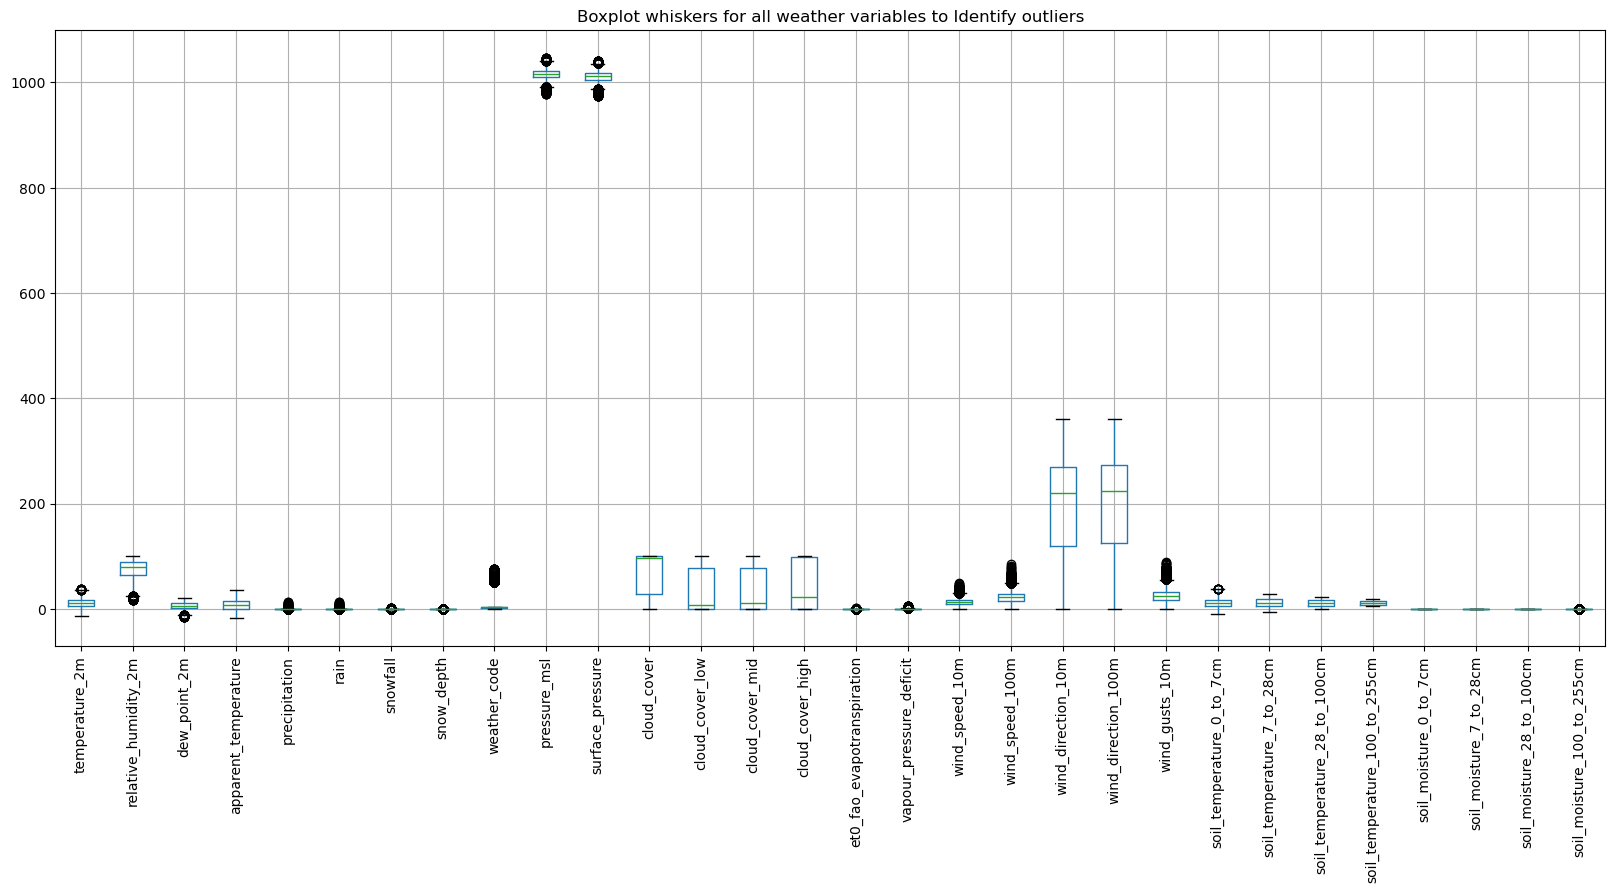

In [10]:
plt.figure(figsize=(20, 8))
weather_data.boxplot()
plt.title("Boxplot whiskers for all weather variables to Identify outliers")
plt.xticks(rotation = 90)
plt.show();

From the above visual we can see most columns have some extreme values, which is represented by the dark spots. Our data variables seem to be in different scale as we can see the size of the box whiskers are different. This is a good indication that we need to scale our data before applying any machine learning algorithm. The extreme data points can be accredited to occurrence of exorbitant weather conditions; maybe during different seasons throughout the year. We will keep them for now and do further analysis of each individual variable to understand it more.

### 1.4 SUMMARY STATISTICS
We will use the `describe()` function from pandas to get a summary of our data. This will give us the count, mean, standard deviation, min, 25%, 50%, 75 % and max of each variable. This will help us to understand the distribution of our data. 

In [11]:
#descriptive statistics
weather_data.describe()

temperature_2m  relative_humidity_2m  dew_point_2m  \
count    35160.000000          35160.000000  35160.000000   
mean        11.001529             75.210136      6.200259   
std          8.128738             17.476027      6.214458   
min        -13.191500             16.448080    -15.391500   
25%          4.658500             63.573071      1.758500   
50%         10.408501             79.589073      6.308500   
75%         17.058500             89.633457     10.958500   
max         37.708500            100.000000     21.358500   

       apparent_temperature  precipitation          rain      snowfall  \
count          35160.000000   35160.000000  35160.000000  35160.000000   
mean               8.391306       0.074605      0.070179      0.003106   
std                9.514300       0.345978      0.341099      0.038204   
min              -17.291695       0.000000      0.000000      0.000000   
25%                0.705447       0.000000      0.000000      0.000000   
50%                7.564425       0.000000      0.000000      0.000000   
75%               15.844712       0.000000      0.000000      0.000000   
max               36.522781      13.700000     13.700000      2.100000   

         snow_depth  weather_code  pressure_msl  ...  wind_direction_100m  \
count  35160.000000  35160.000000  35160.000000  ...         35160.000000   
mean       0.003216     10.311604   1015.756104  ...           201.435303   
std        0.012164     19.400906      9.799638  ...            91.307182   
min        0.000000      0.000000    978.599976  ...             0.415171   
25%        0.000000      1.000000   1009.700012  ...           125.583925   
50%        0.000000      3.000000   1016.200012  ...           224.916412   
75%        0.000000      3.000000   1022.200012  ...           272.547577   
max        0.110000     75.000000   1046.300049  ...           360.000000   

       wind_gusts_10m  soil_temperature_0_to_7cm  soil_temperature_7_to_28cm  \
count    35160.000000               35160.000000                35160.000000   
mean        25.442467                  11.393143                   11.345592   
std         11.852432                   8.190139                    7.291096   
min          0.720000                  -9.241500                   -5.741500   
25%         16.559999                   4.708500                    5.058500   
50%         23.759998                  10.408501                   10.508500   
75%         32.399998                  17.808500                   18.058500   
max         89.279991                  38.458500                   28.908501   

       soil_temperature_28_to_100cm  soil_temperature_100_to_255cm  \
count                  35160.000000                   35160.000000   
mean                      11.187828                      11.032425   
std                        5.824733                       4.126365   
min                        0.758500                       4.708500   
25%                        5.858500                       6.908500   
50%                       11.058500                      10.808500   
75%                       17.058500                      15.108500   
max                       21.758501                      17.958500   

       soil_moisture_0_to_7cm  soil_moisture_7_to_28cm  \
count            35160.000000             35160.000000   
mean                 0.291665                 0.281830   
std                  0.082832                 0.079917   
min                  0.121000                 0.141000   
25%                  0.224000                 0.209000   
50%                  0.312000                 0.289000   
75%                  0.361000                 0.356000   
max                  0.439000                 0.439000   

       soil_moisture_28_to_100cm  soil_moisture_100_to_255cm  
count               35160.000000                35160.000000  
mean                    0.249733                    0.262178  
std                     0.086523

### 1.5 UNIVARIATE DATA ANALYSIS
On this section we are lookig at analysis of individual variables. This is the first step in the data analysis process. The goal of univariate analysis is to summarize the data and to identify the patterns and trends in the individual variables of the  data.

To get a better understanding and identify patterns we will set the date as the index of the dataframe and resample the data into daily mean. We will then use a loop to plot all the variables in order to seee their patterns independently.

In [12]:
#resetting index of the data
analysis_df  = weather_data.set_index("date")
#resample data to daily average
daily_df = analysis_df.resample("D").mean()
#resampling monthly average
monthly_df = analysis_df.resample("M").mean()

/tmp/ipykernel_99196/2900254906.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df = analysis_df.resample("M").mean()


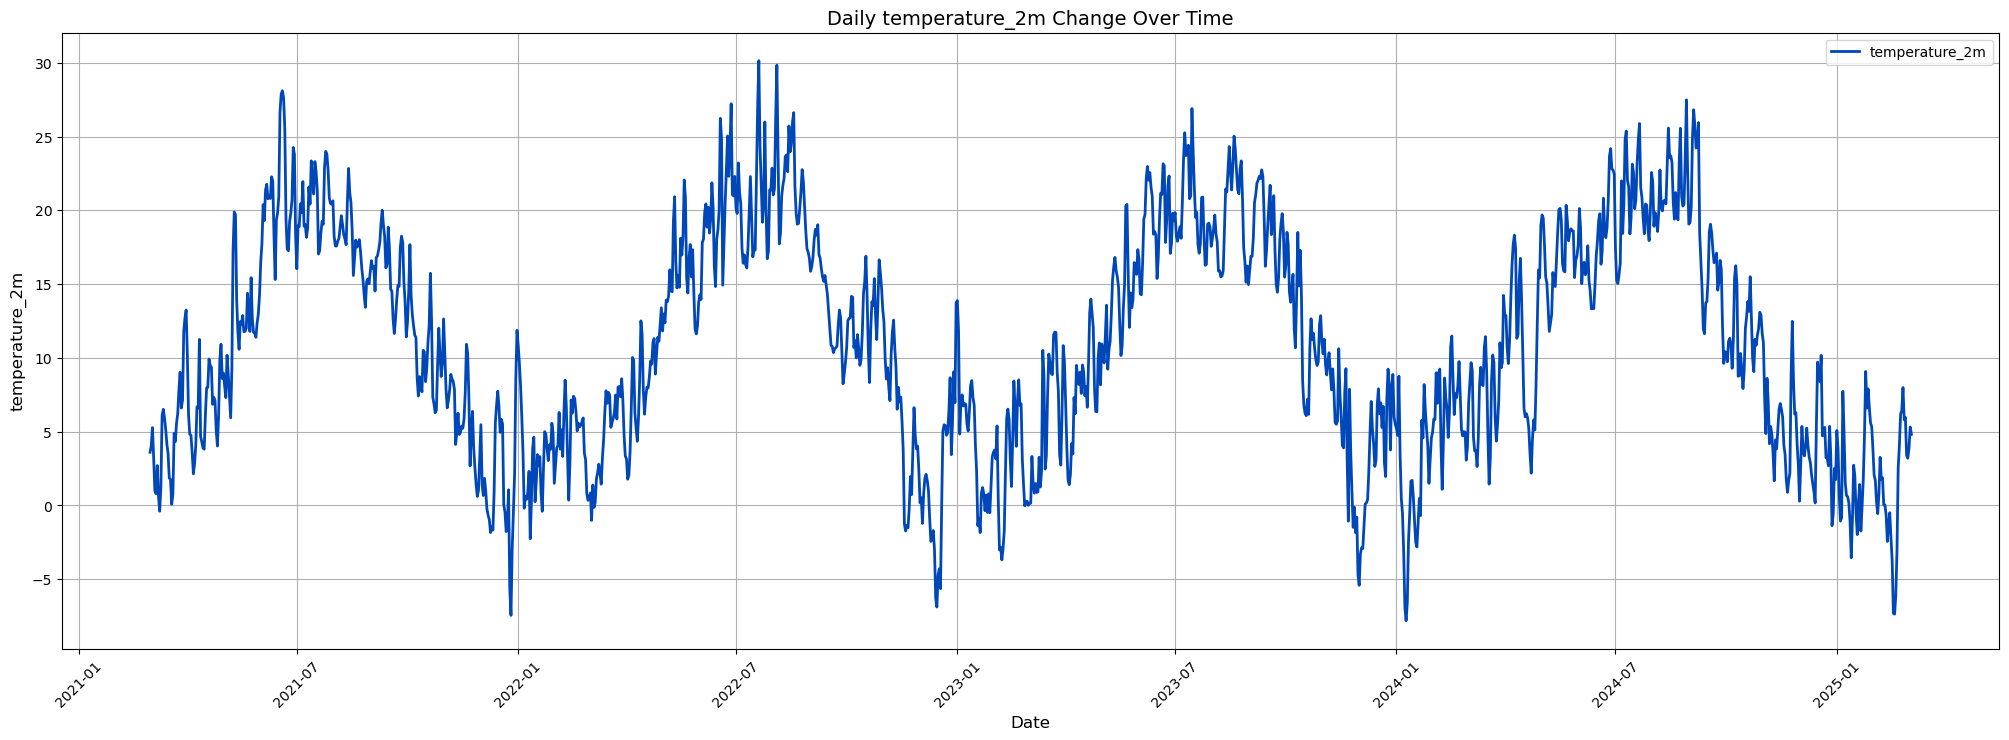

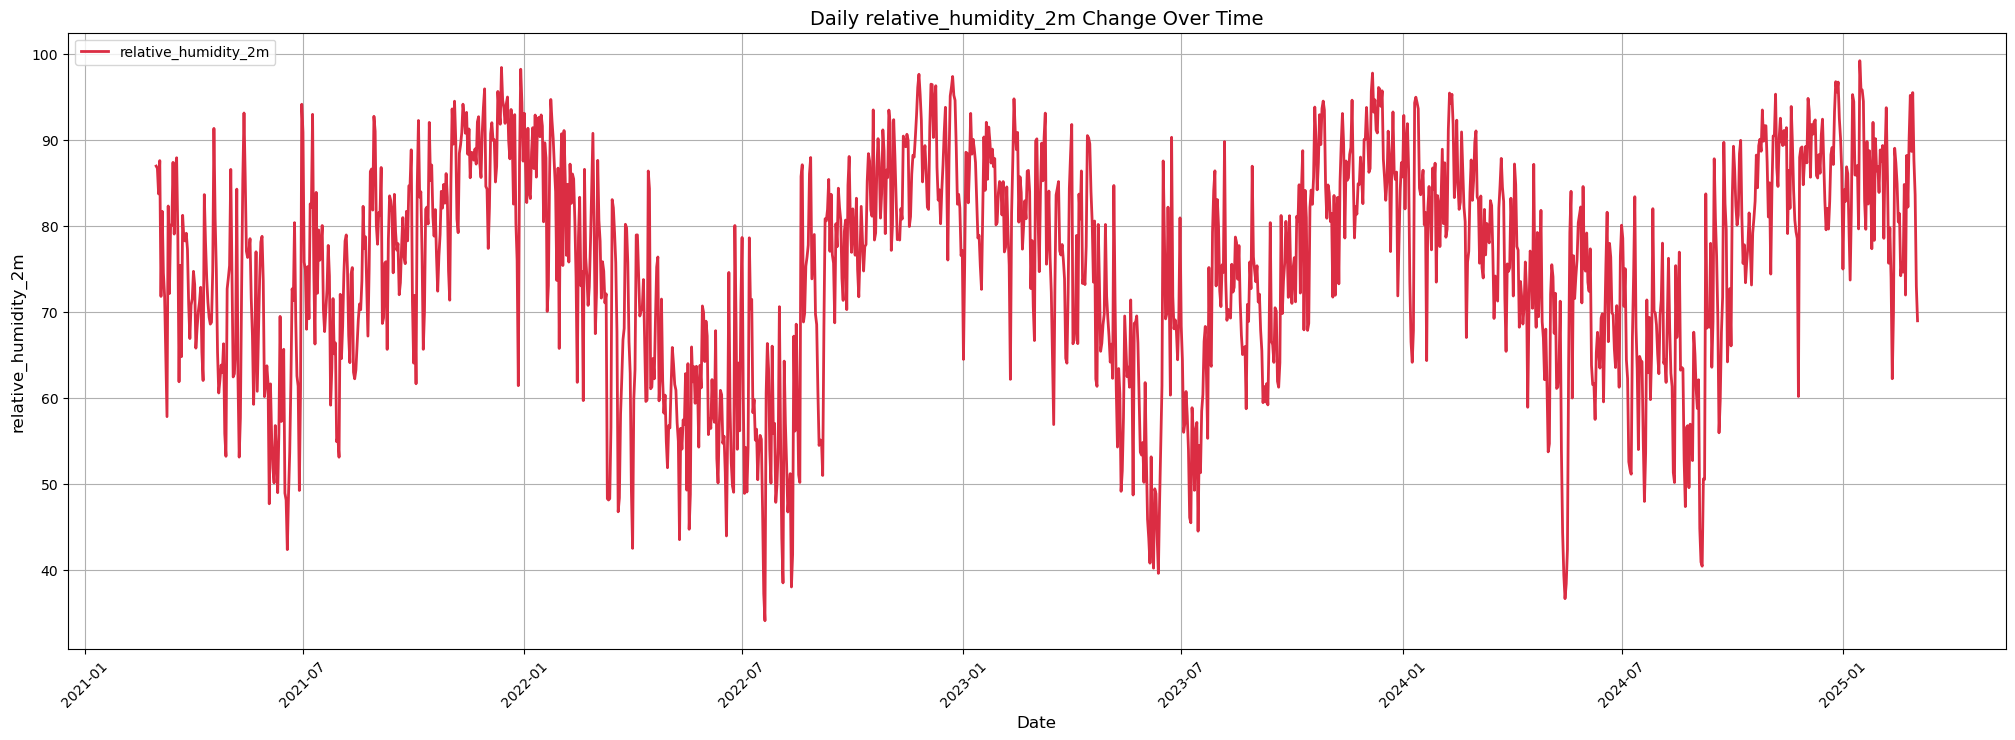

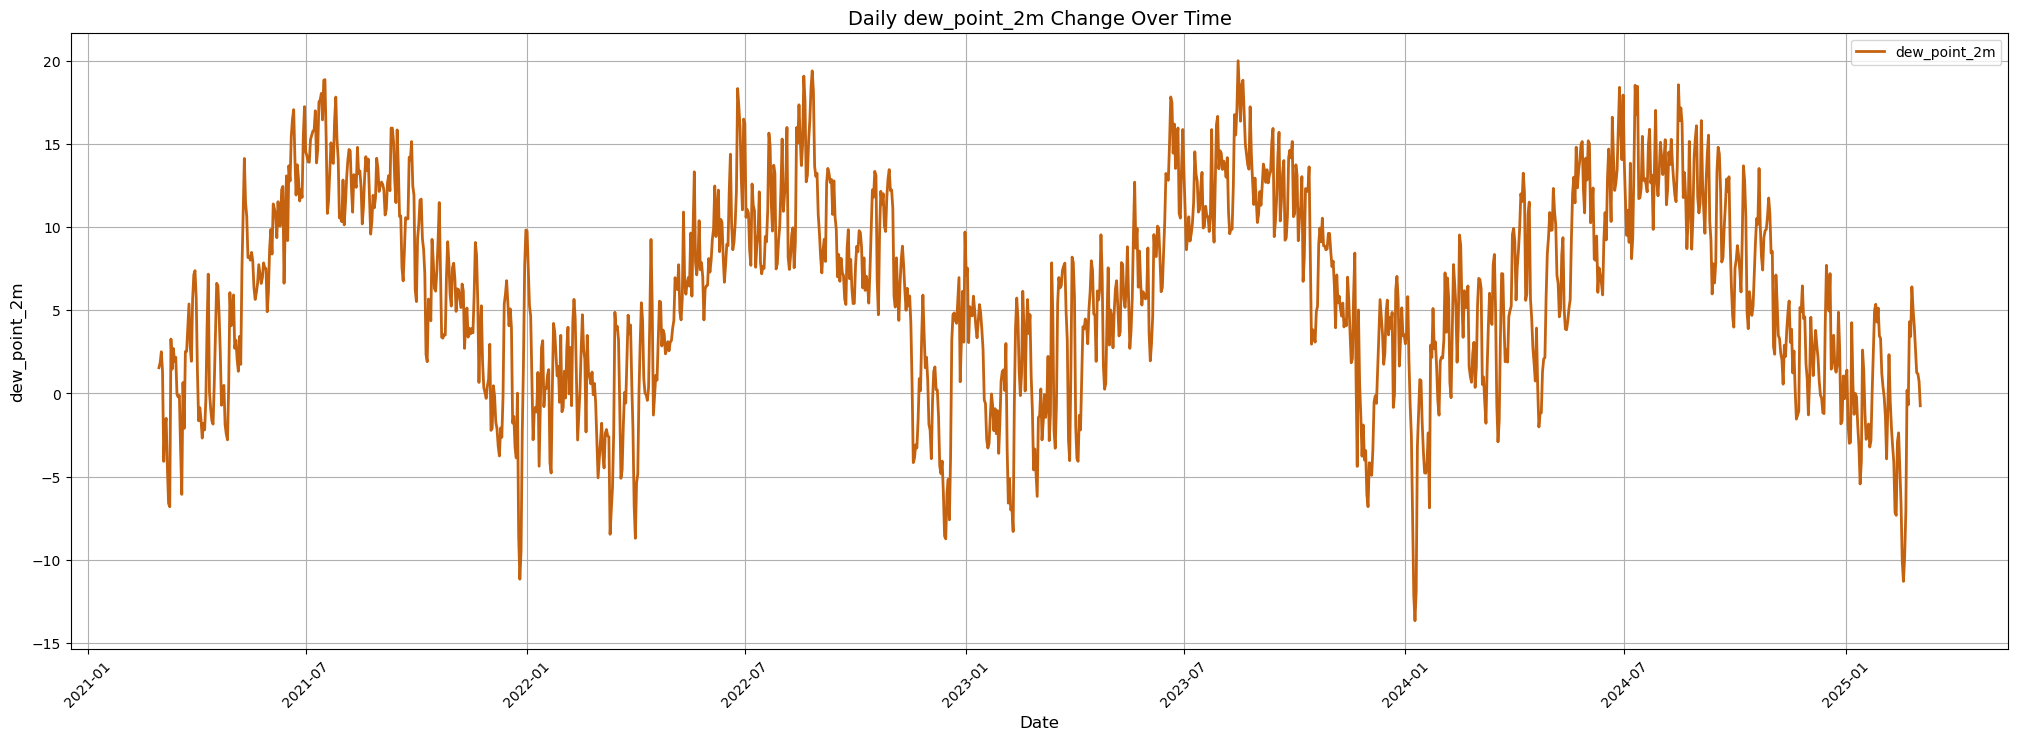

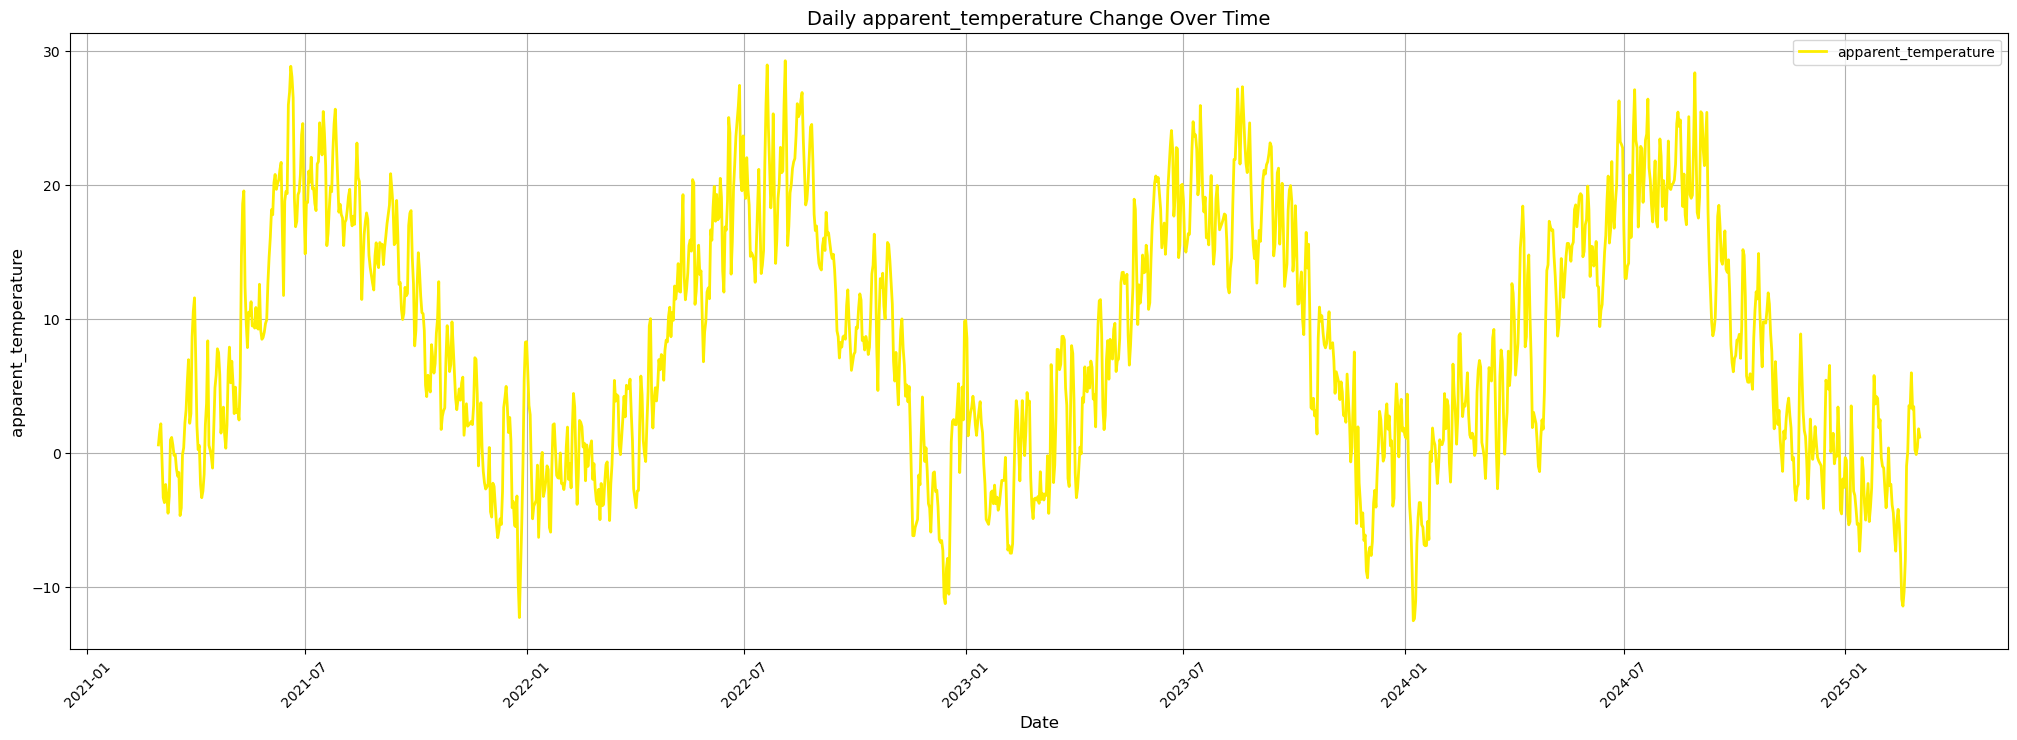

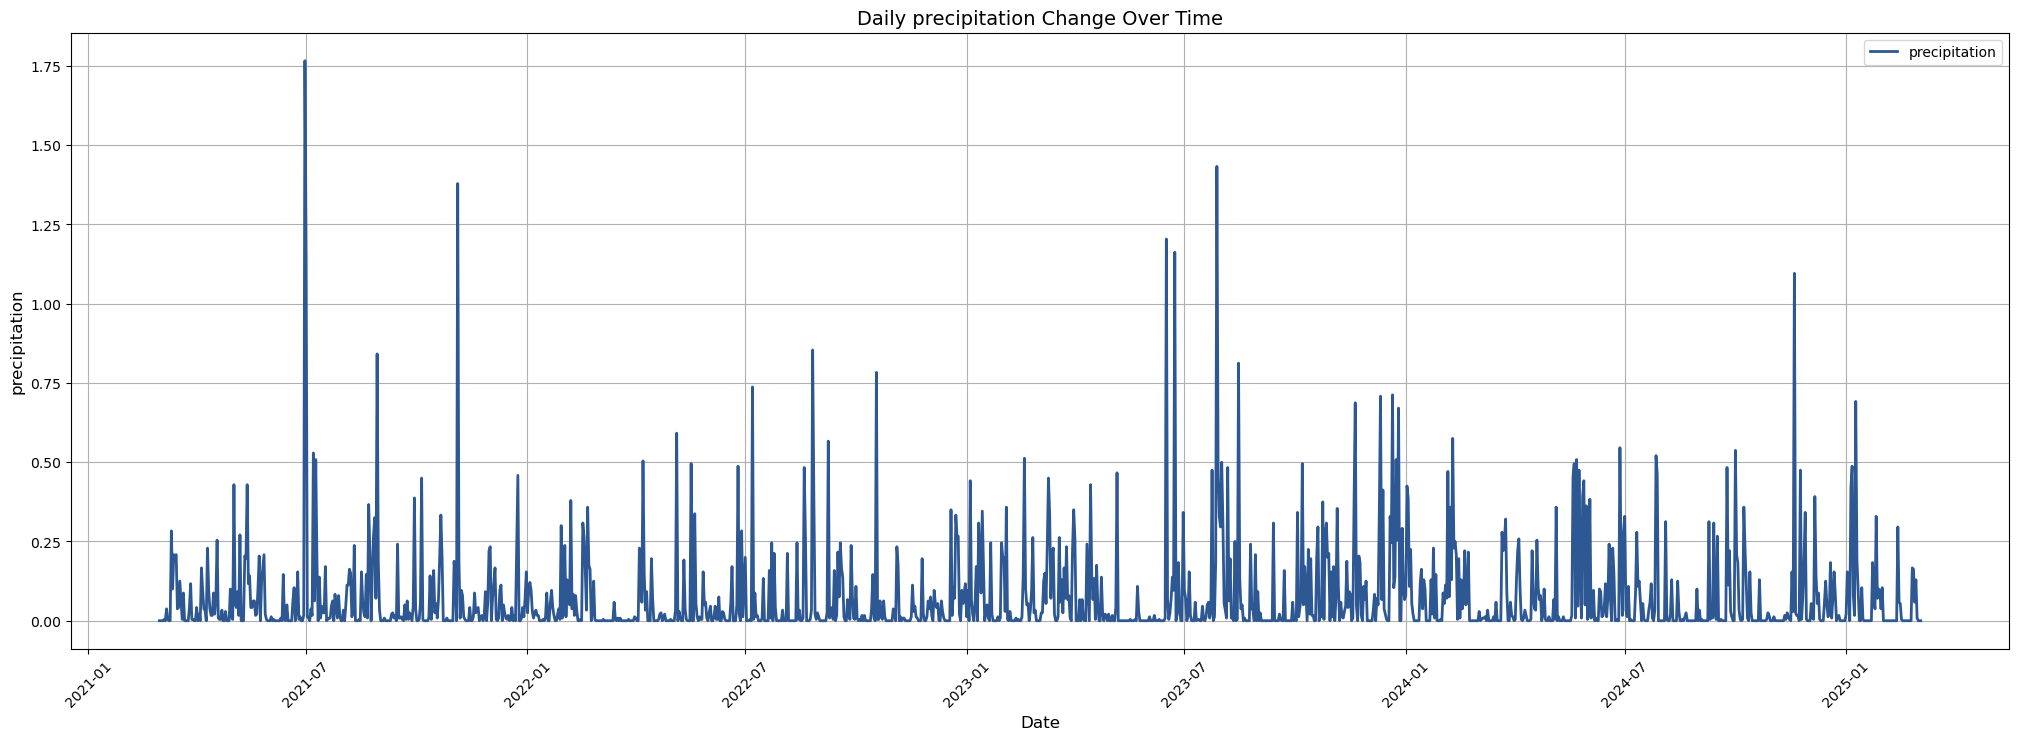

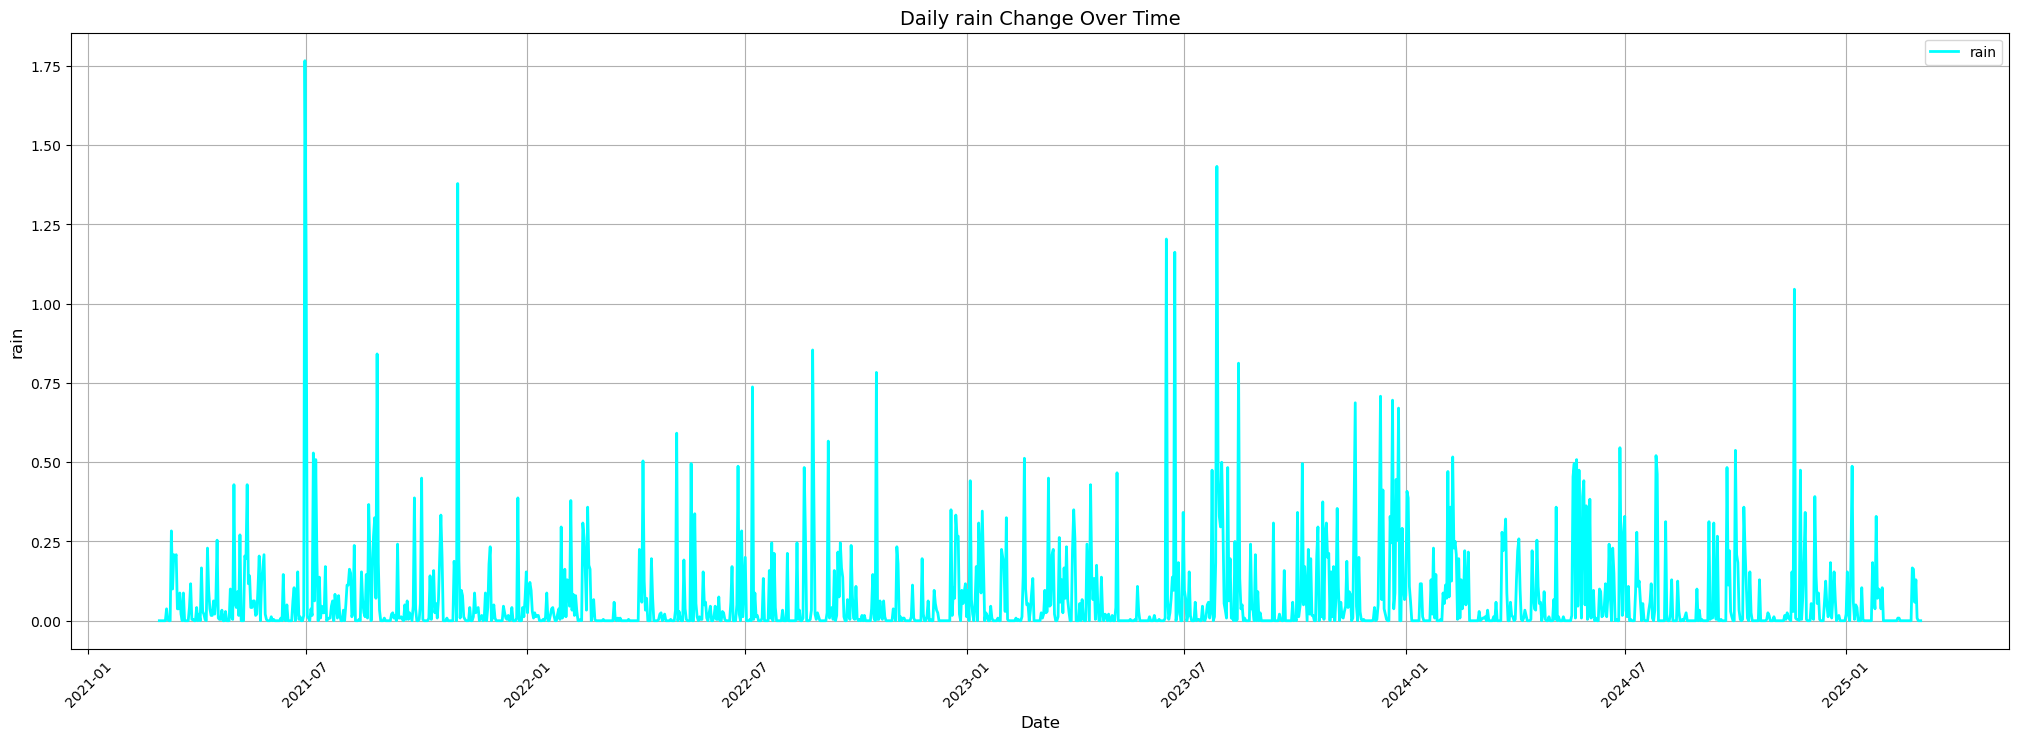

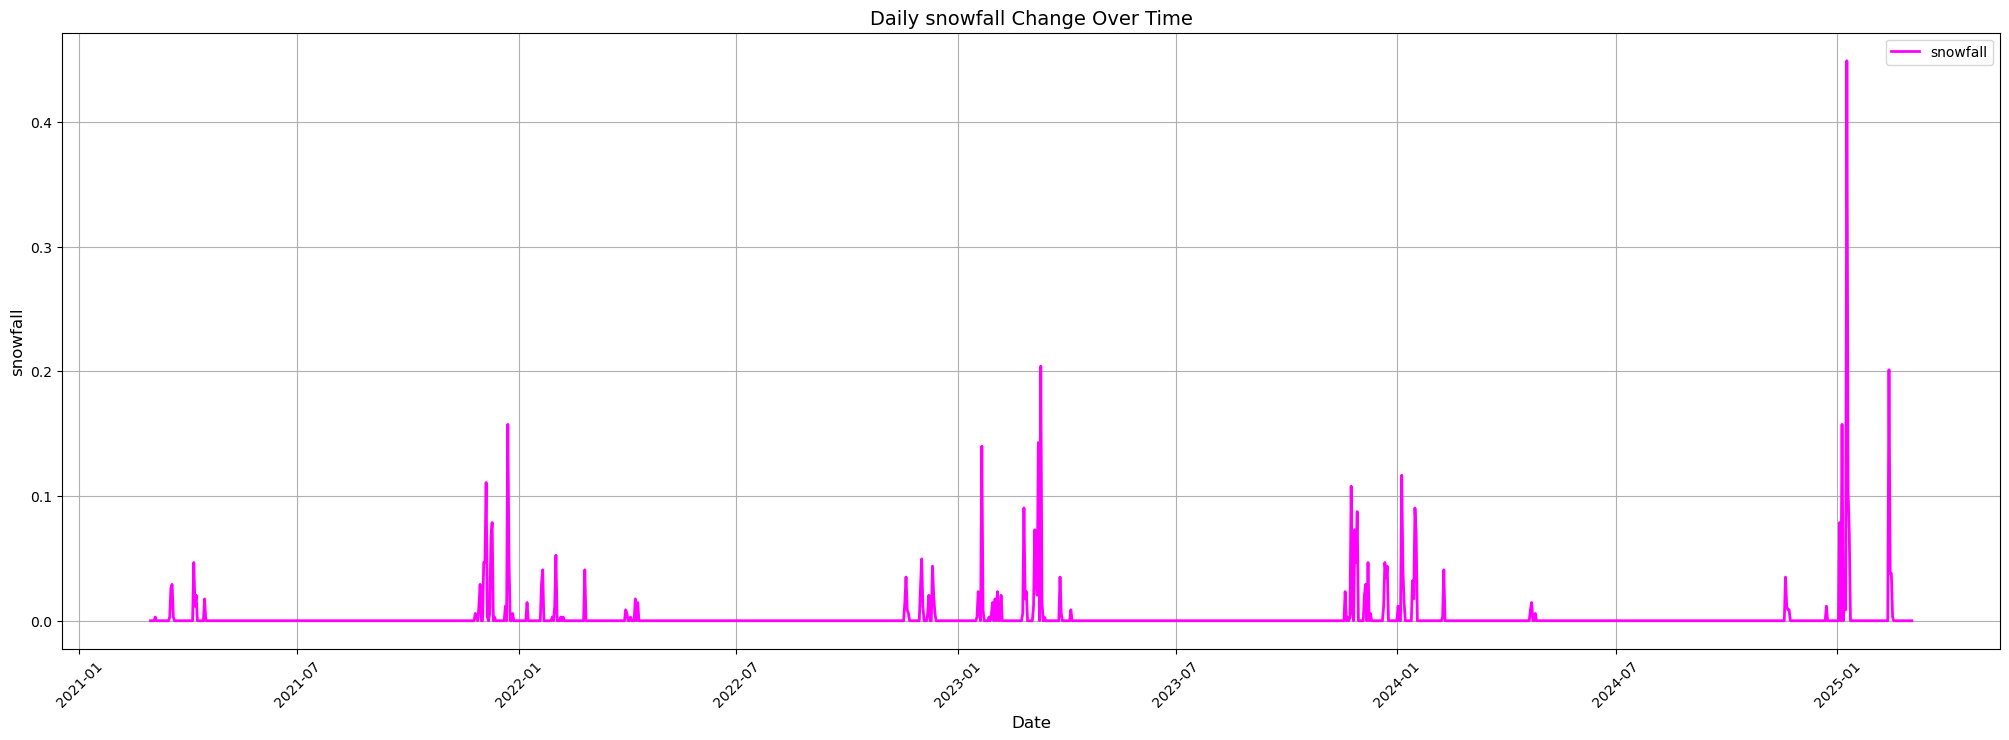

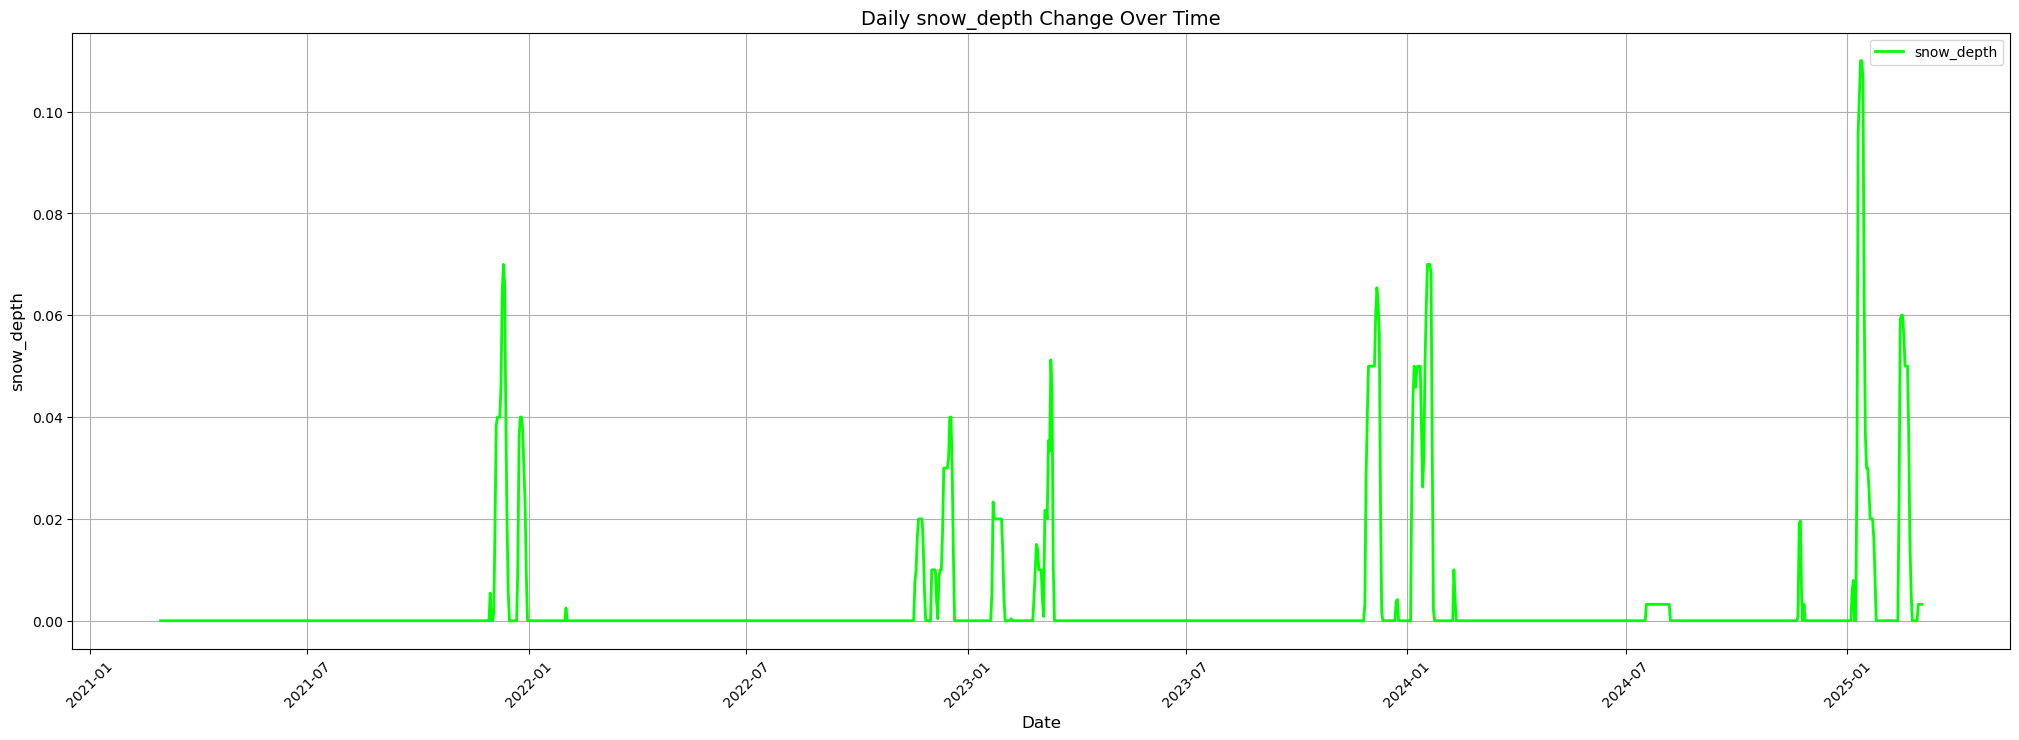

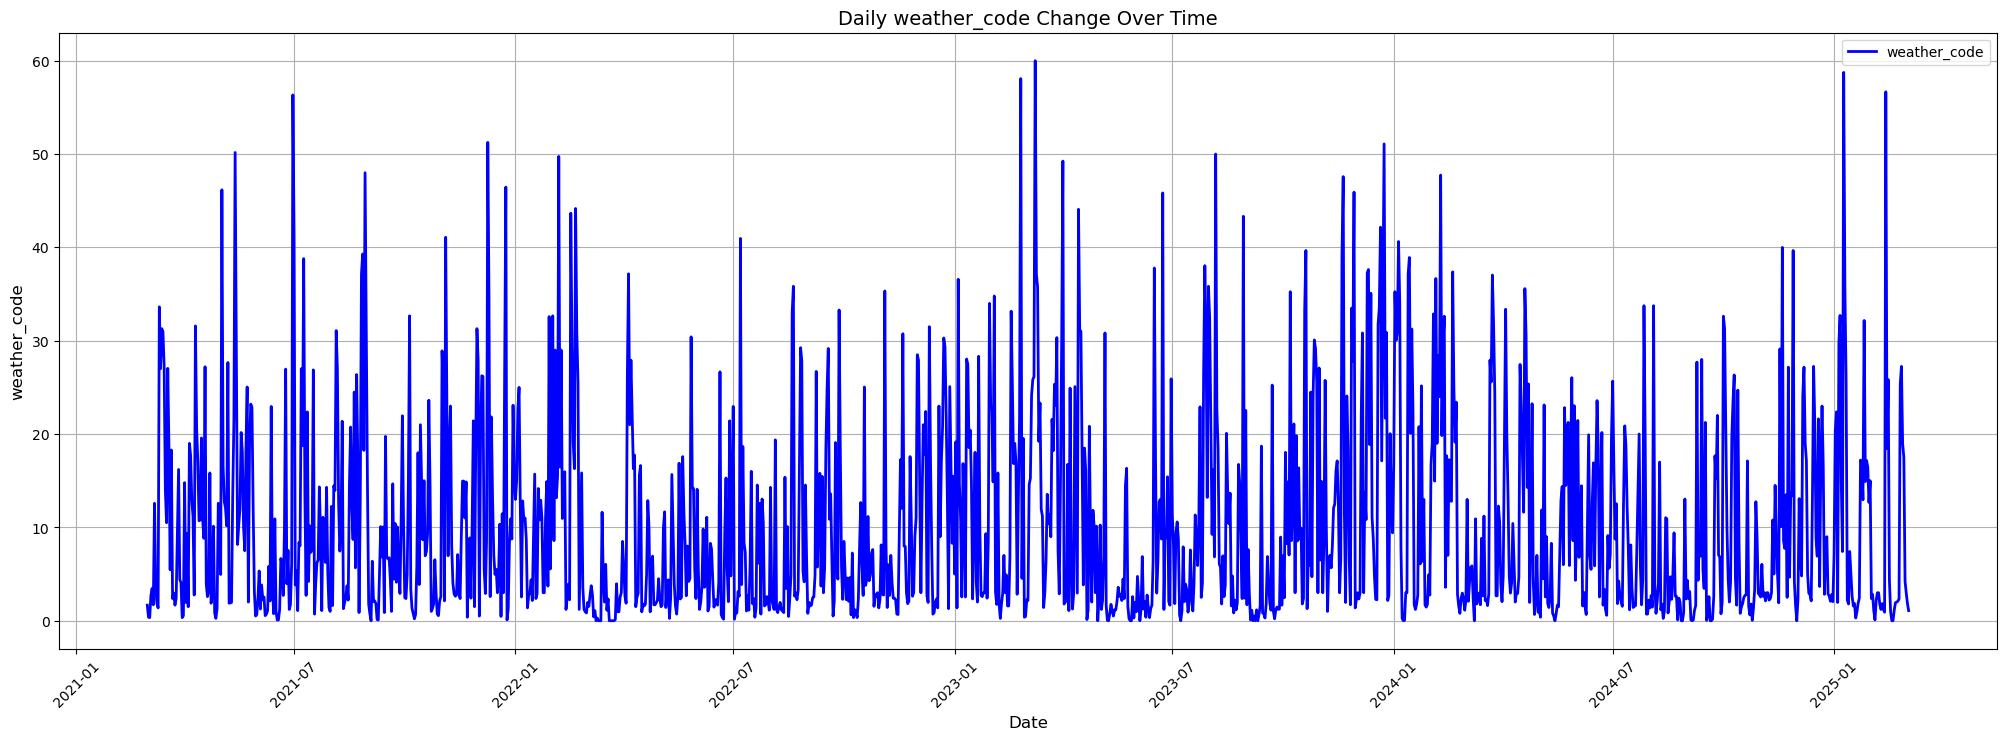

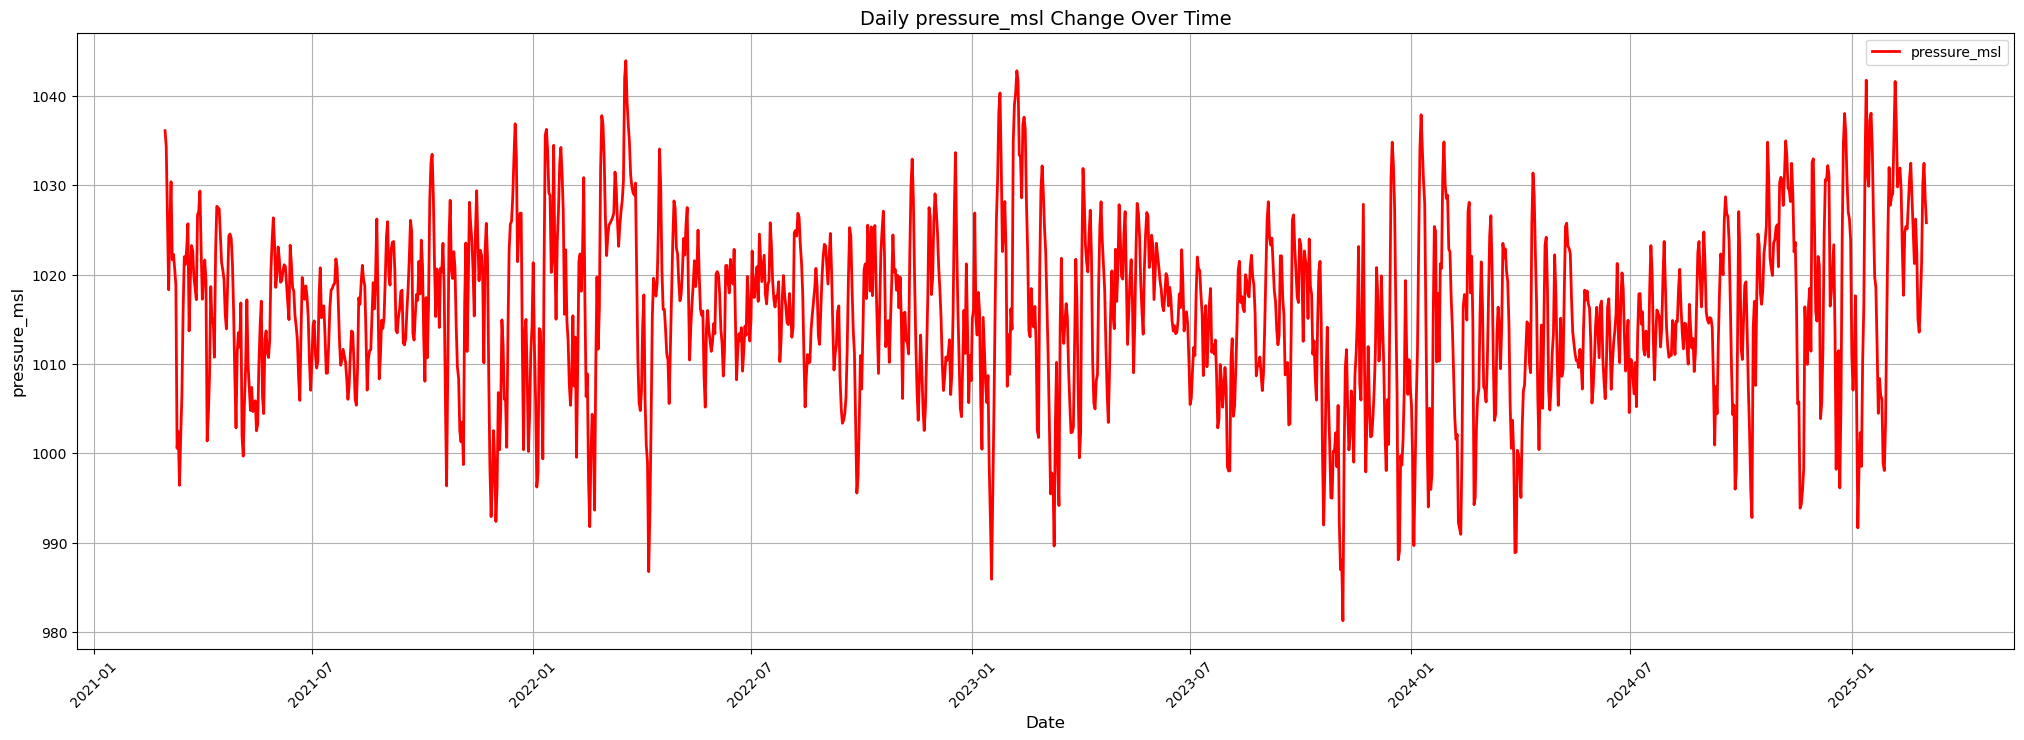

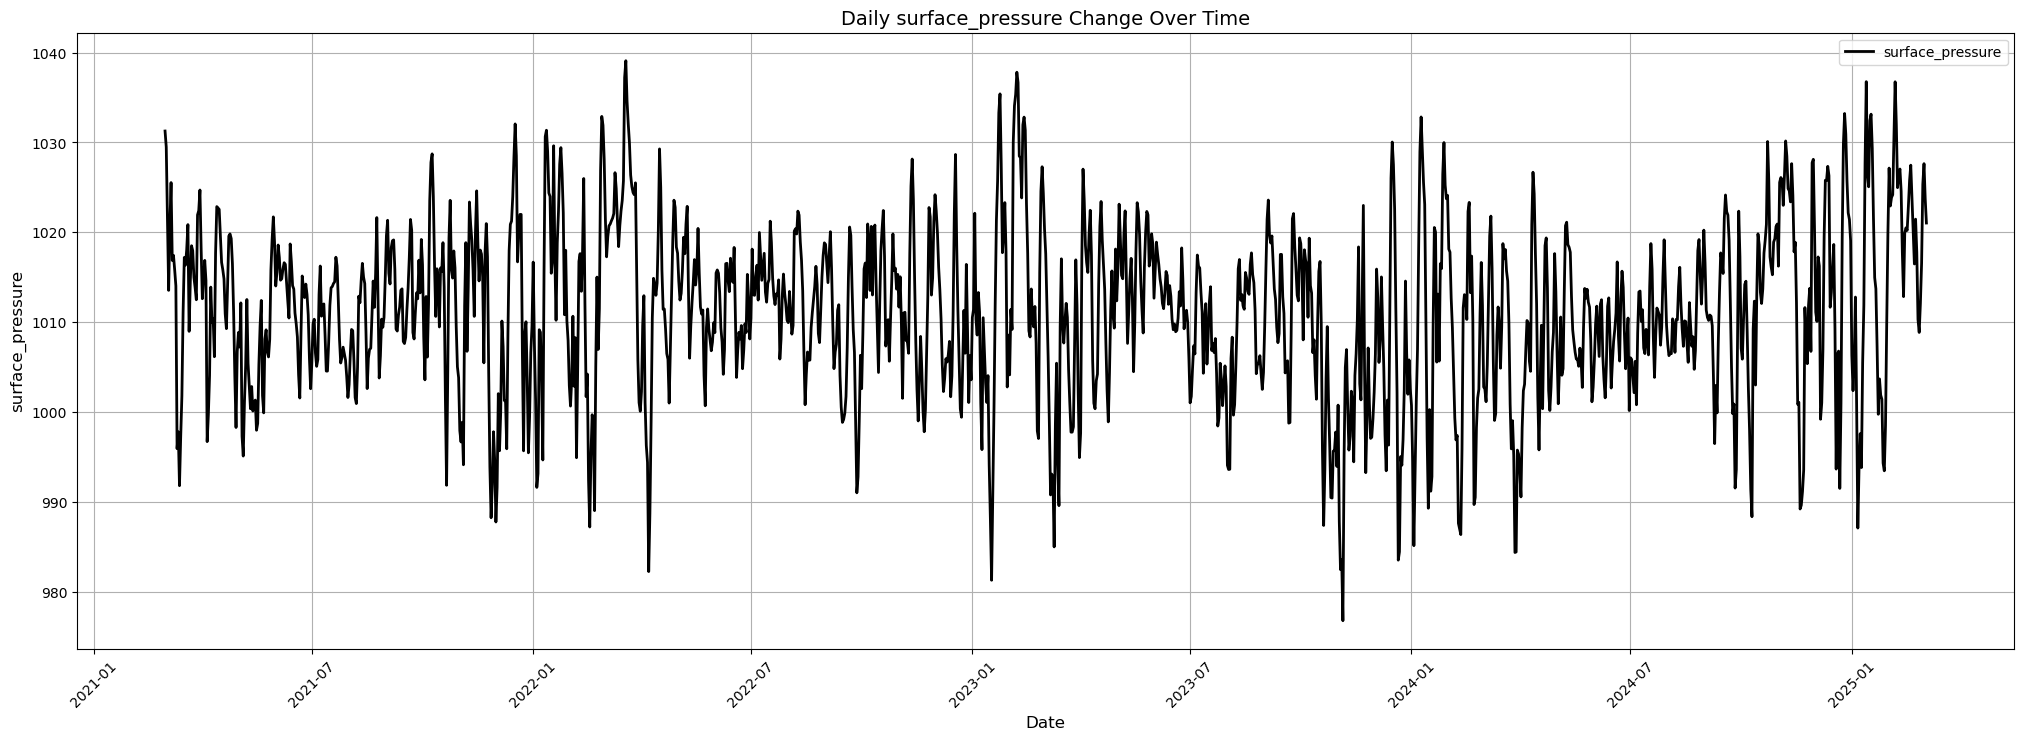

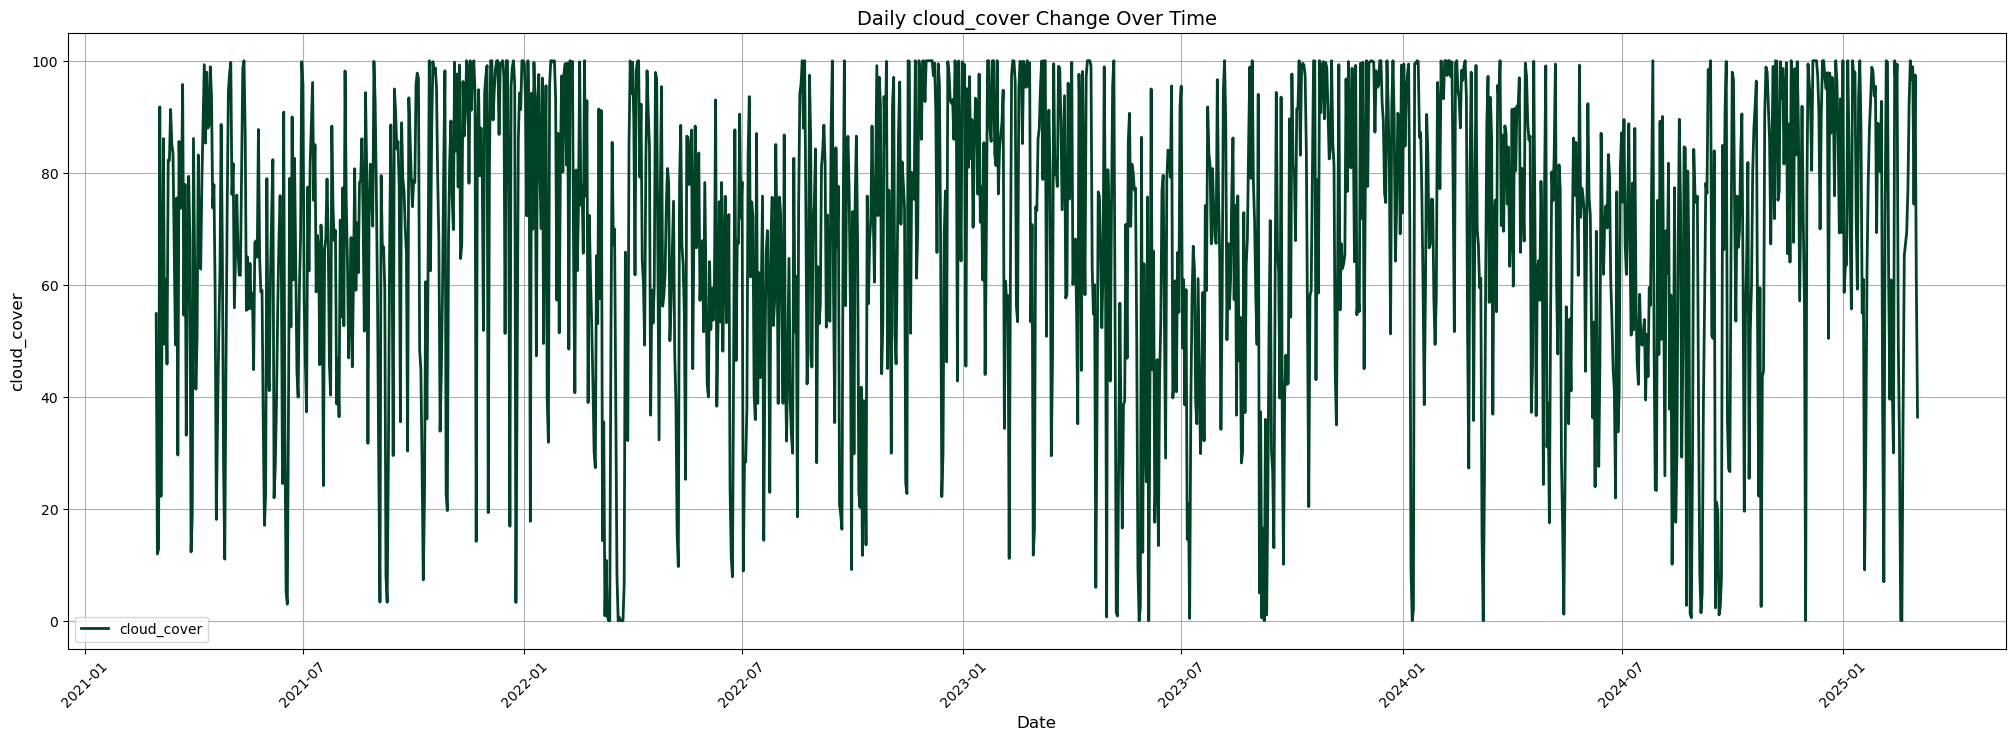

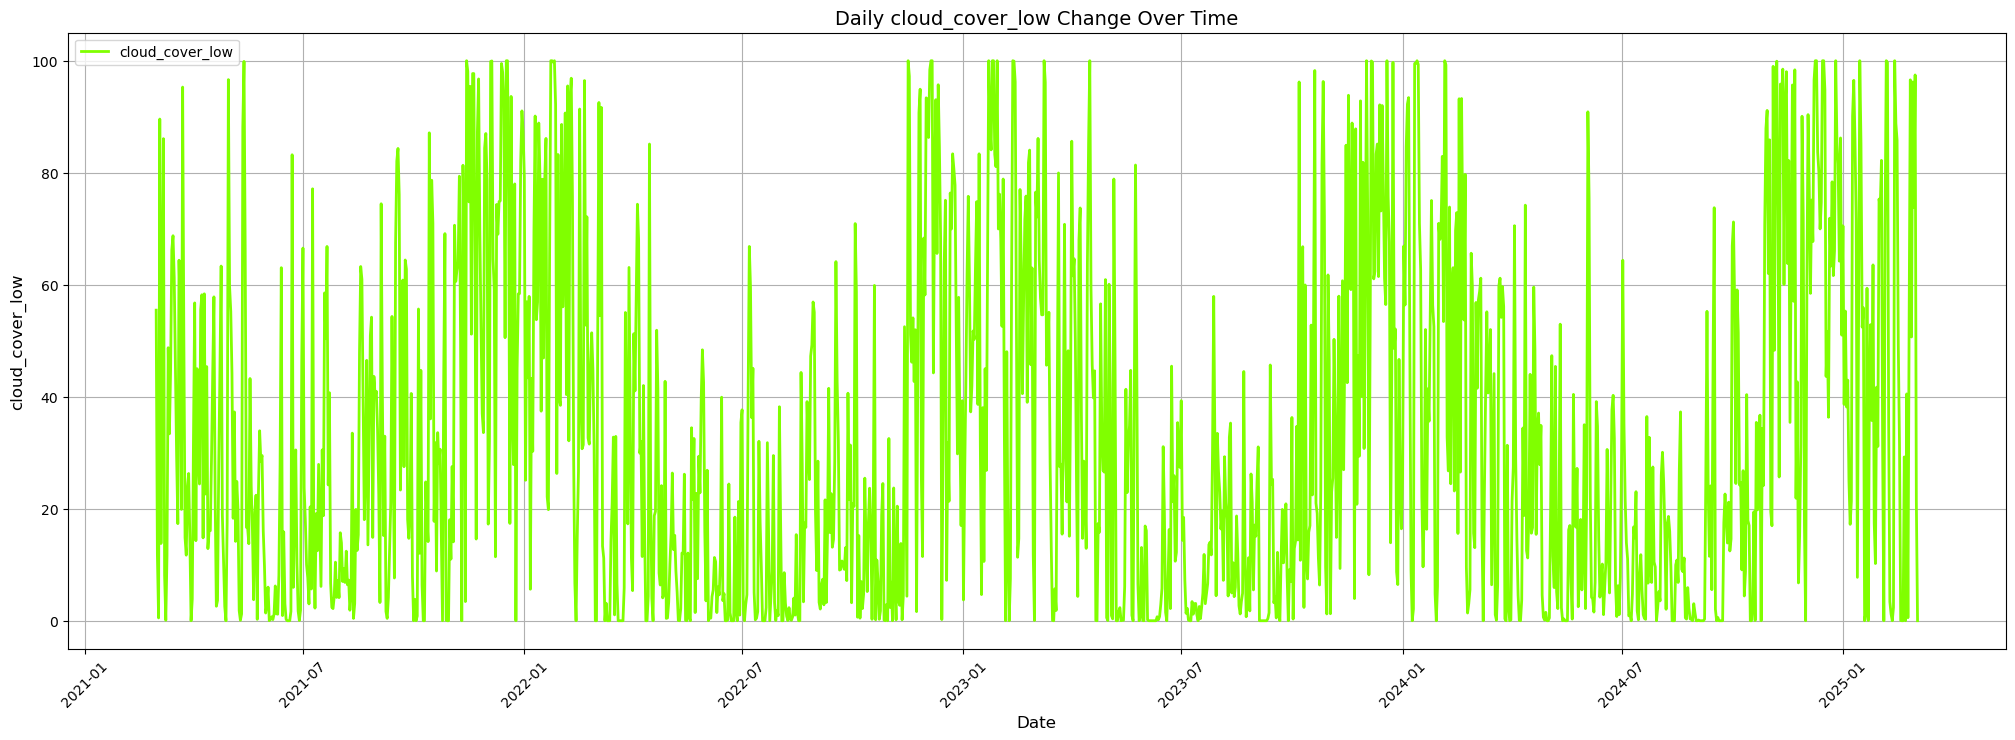

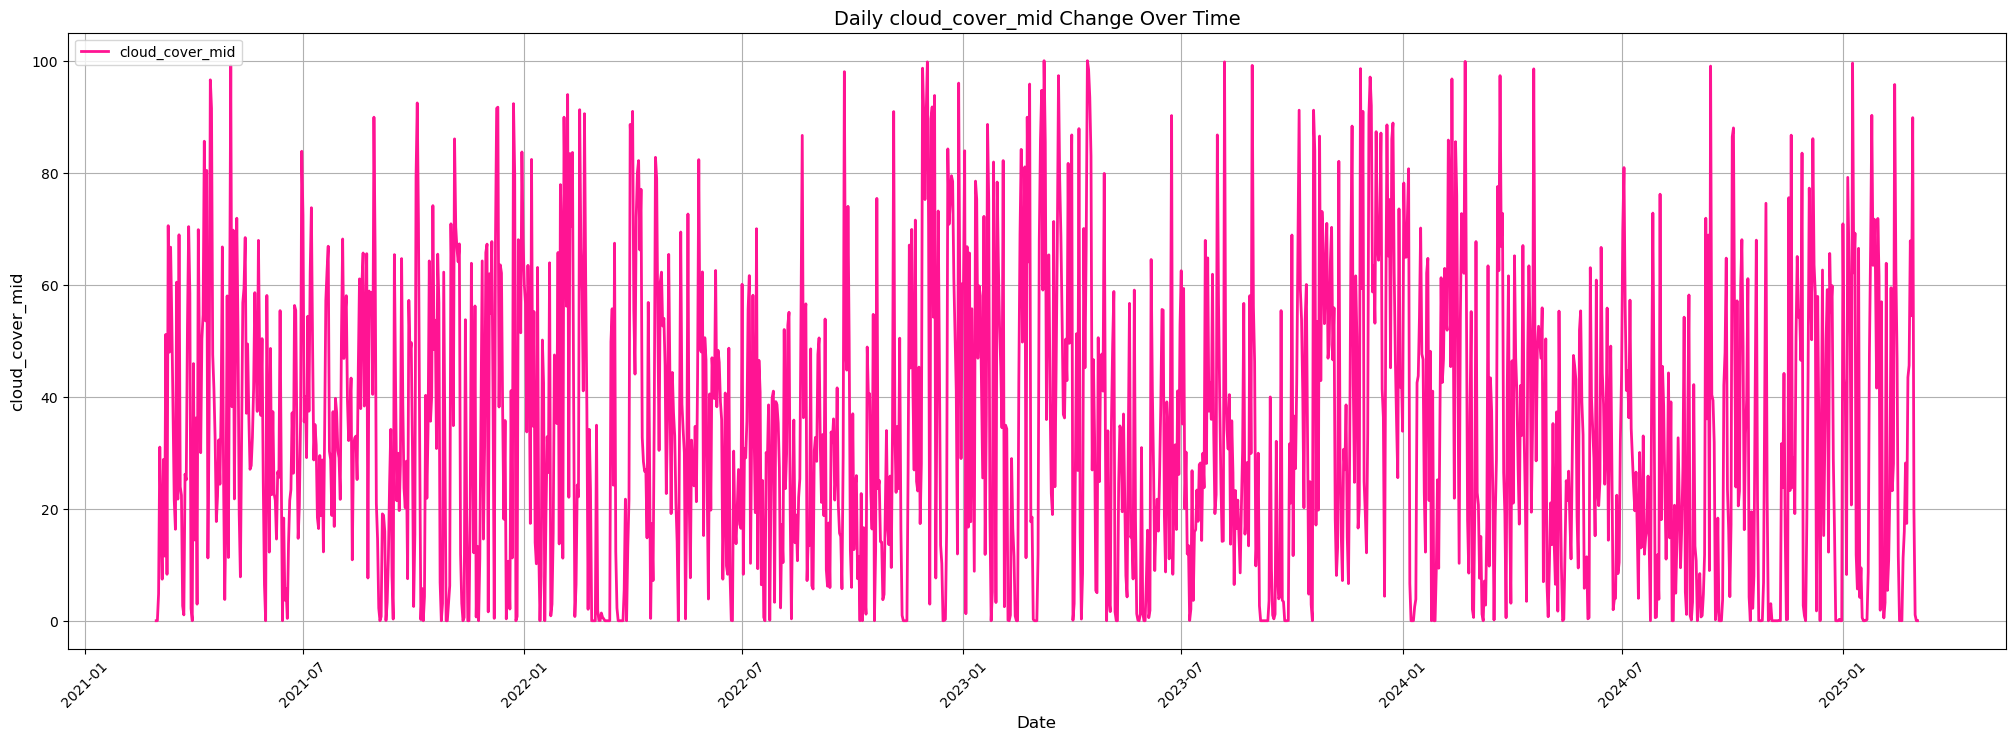

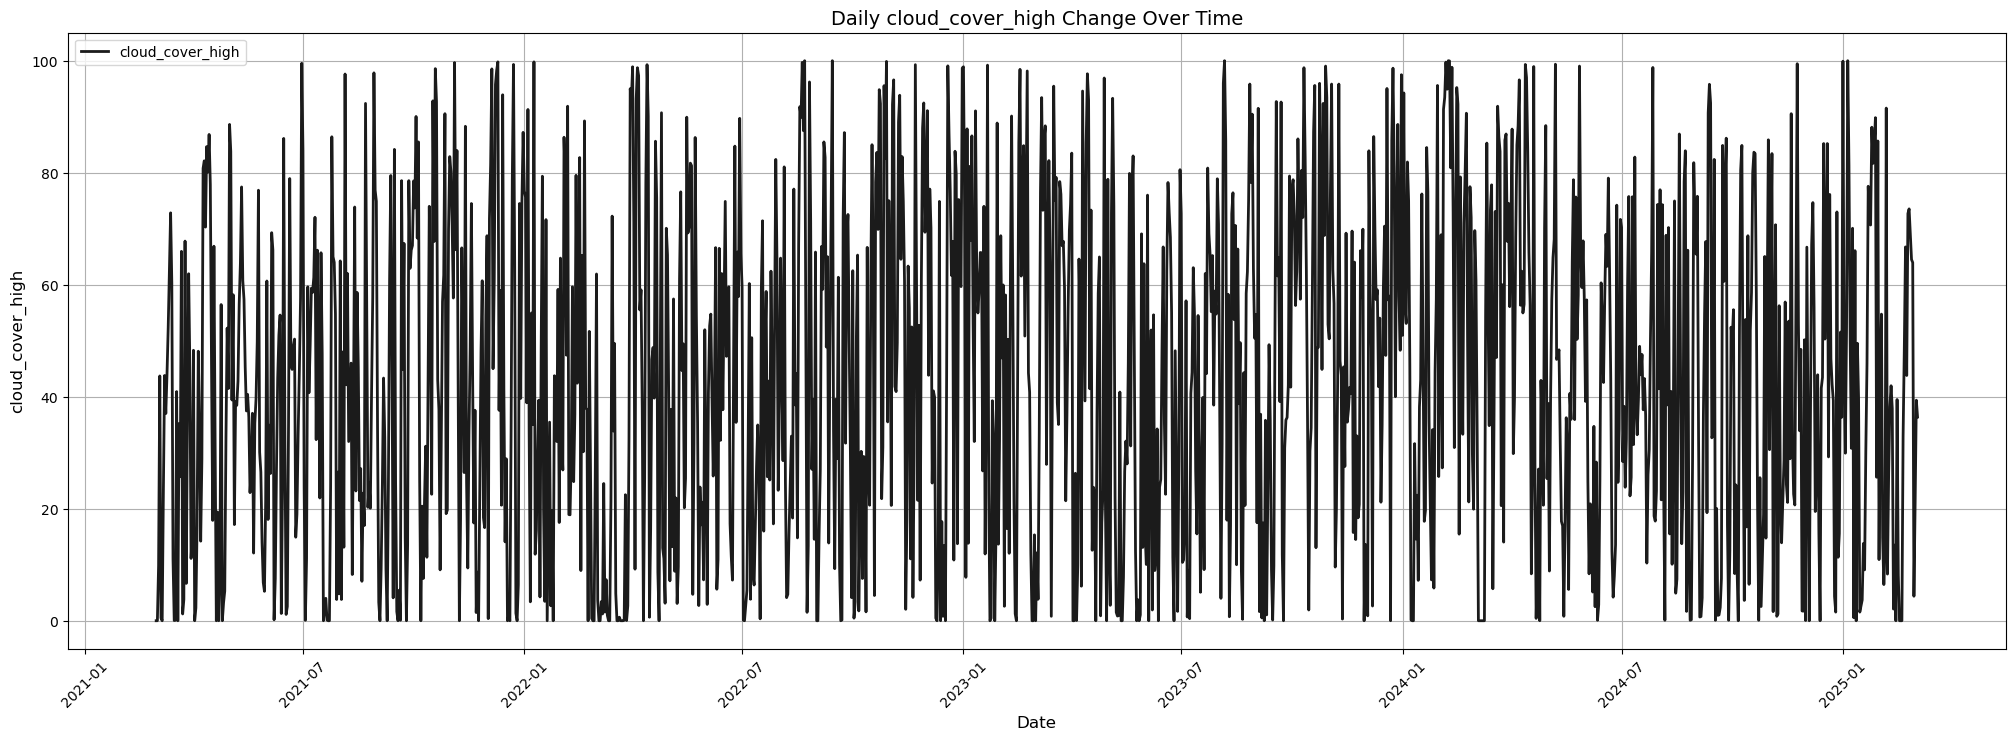

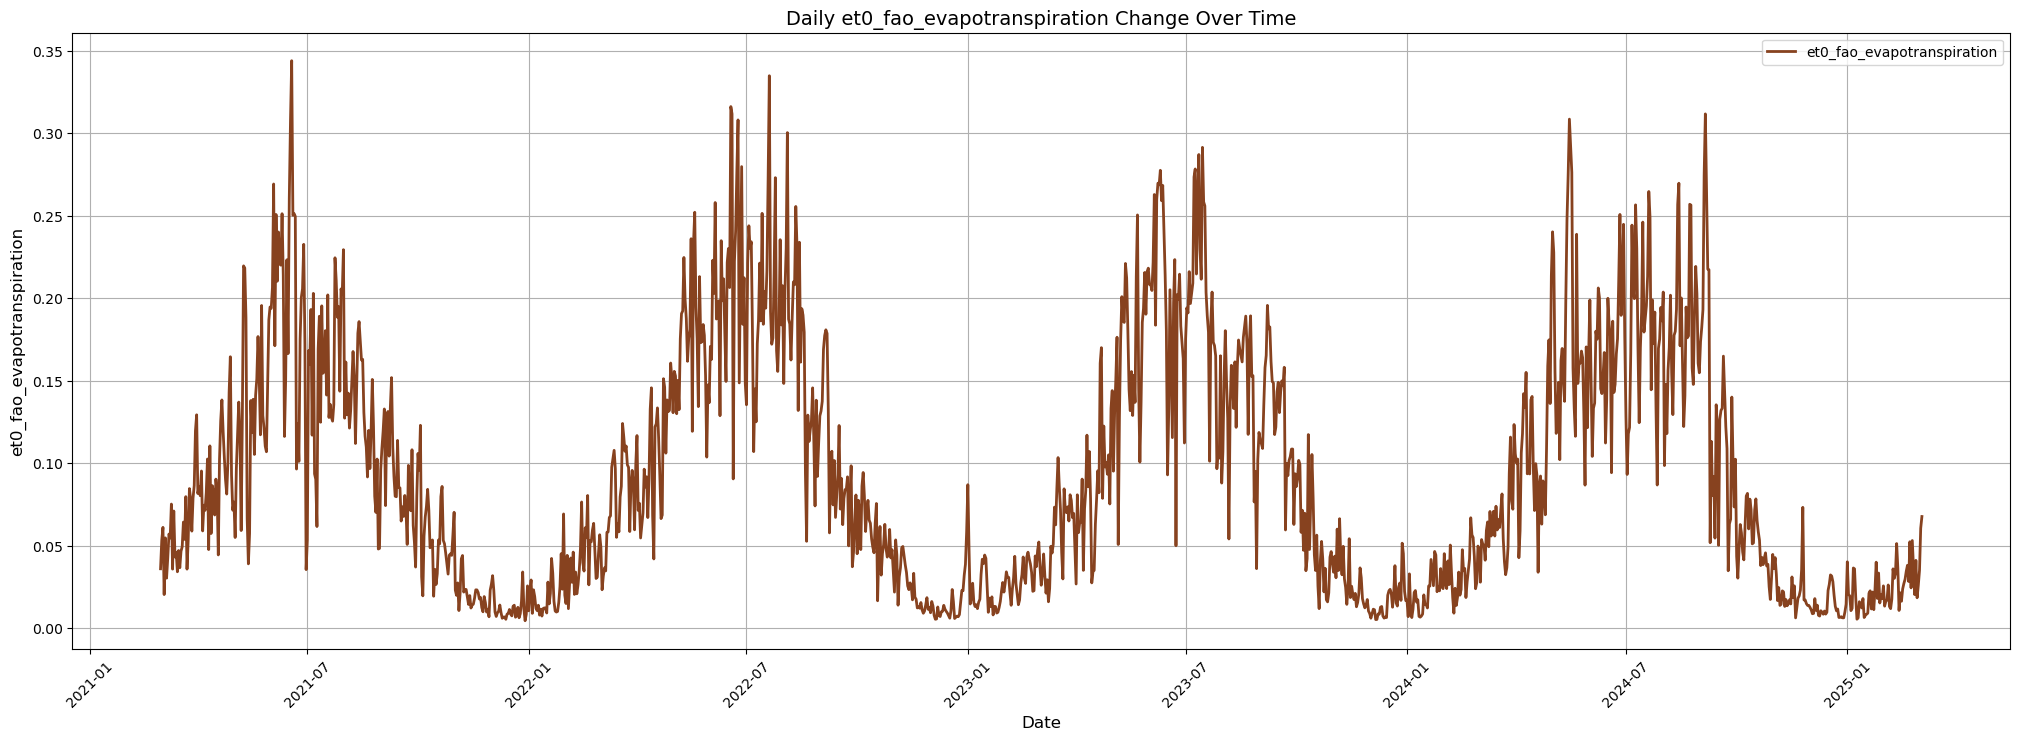

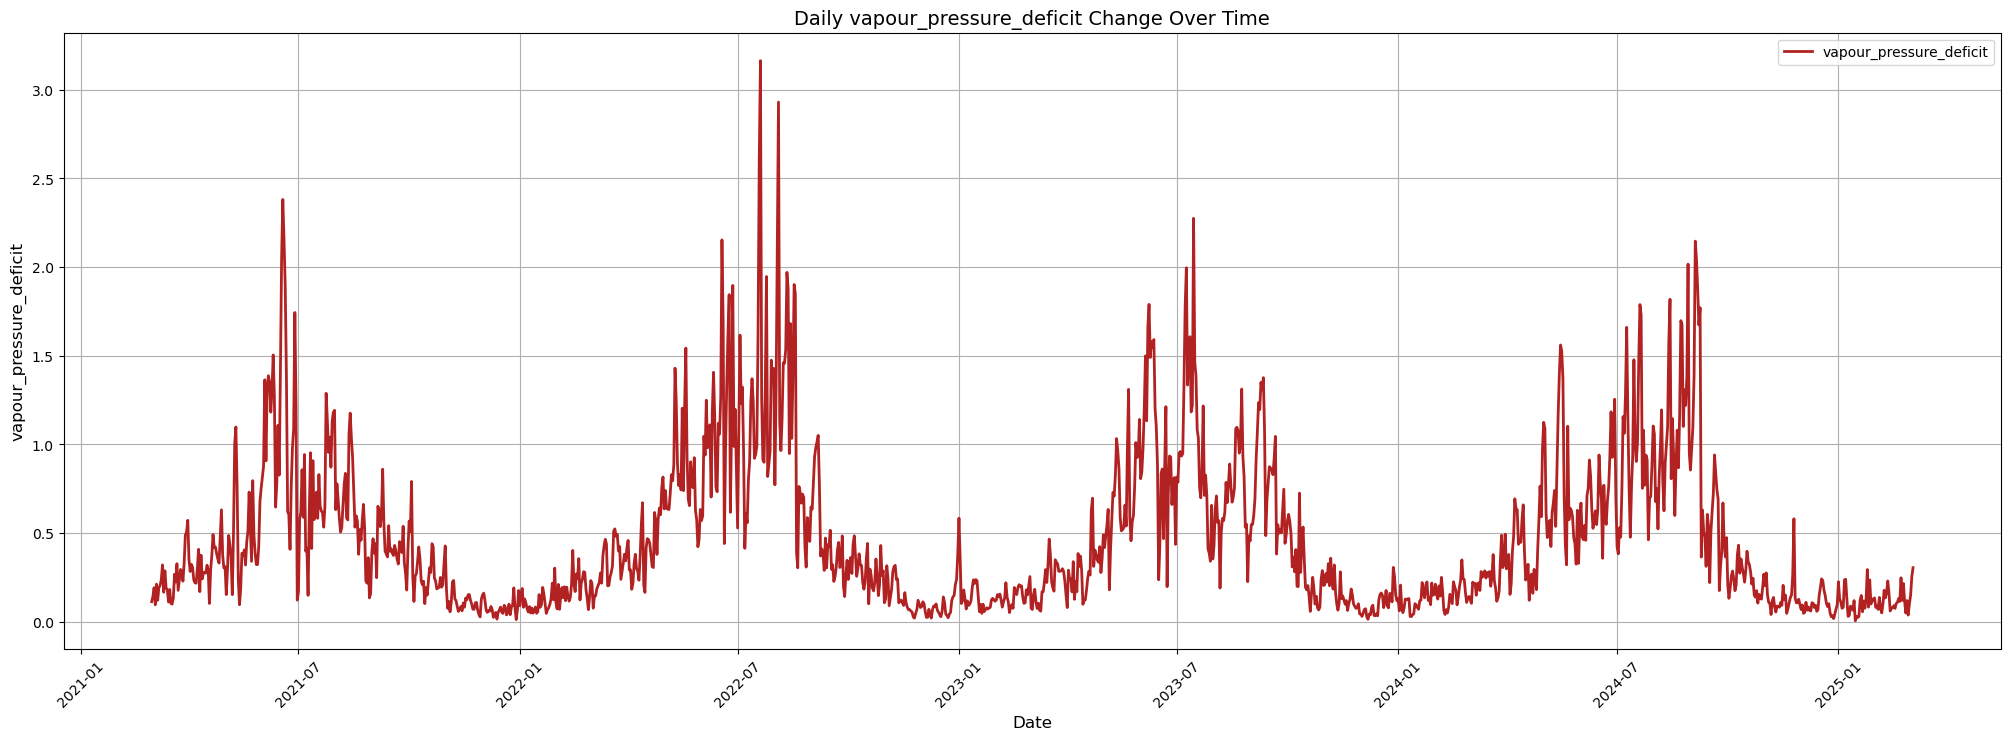

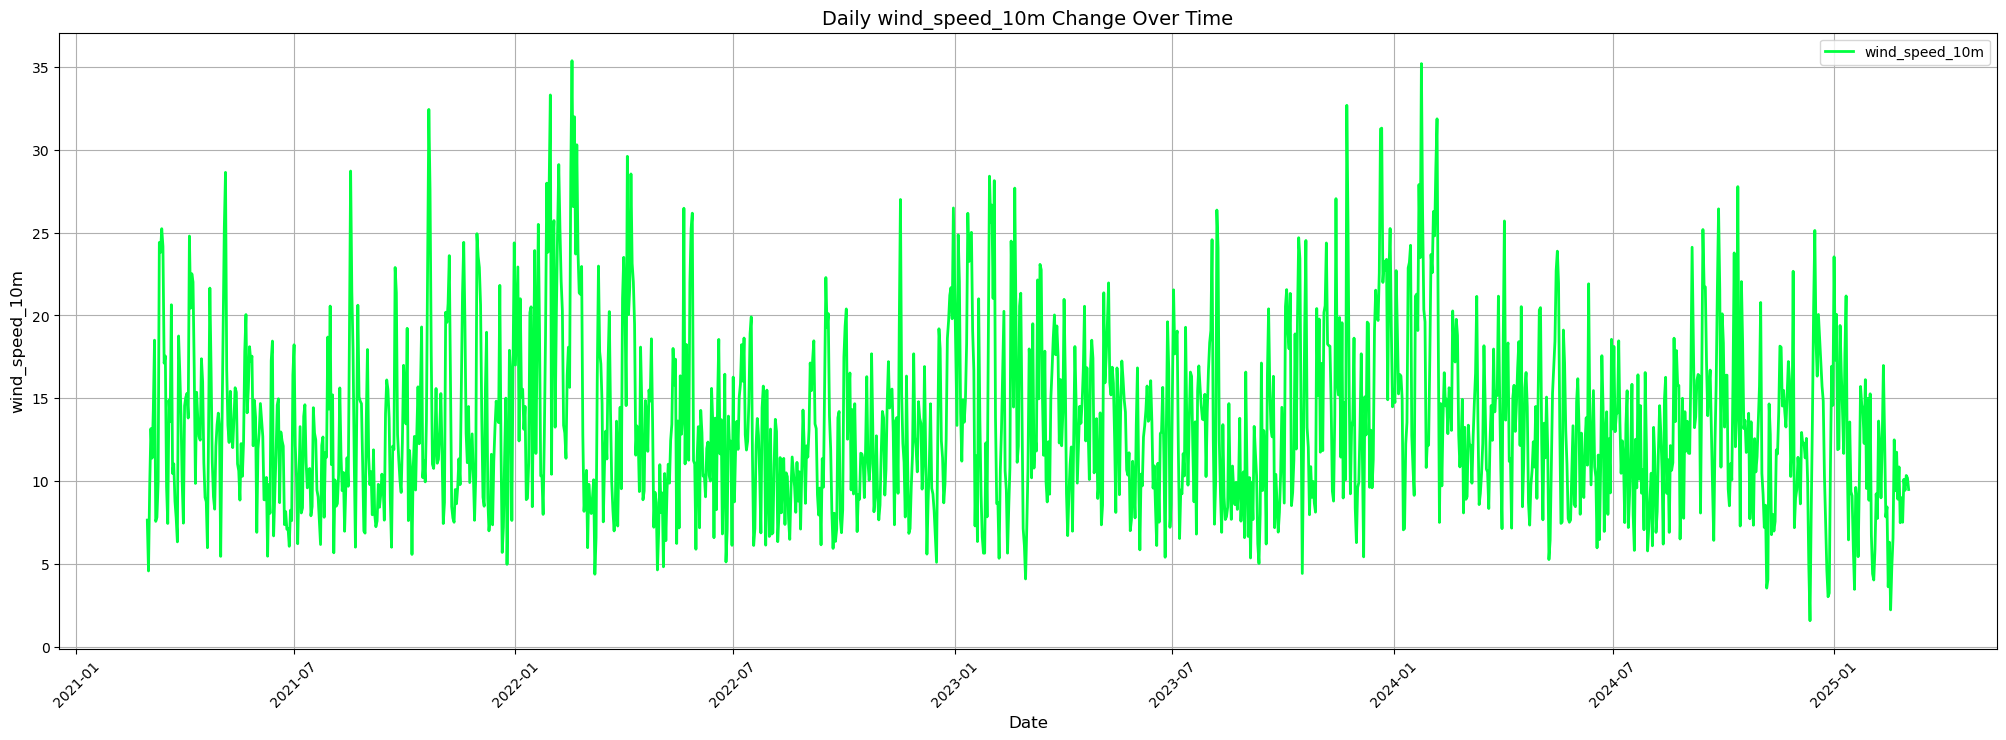

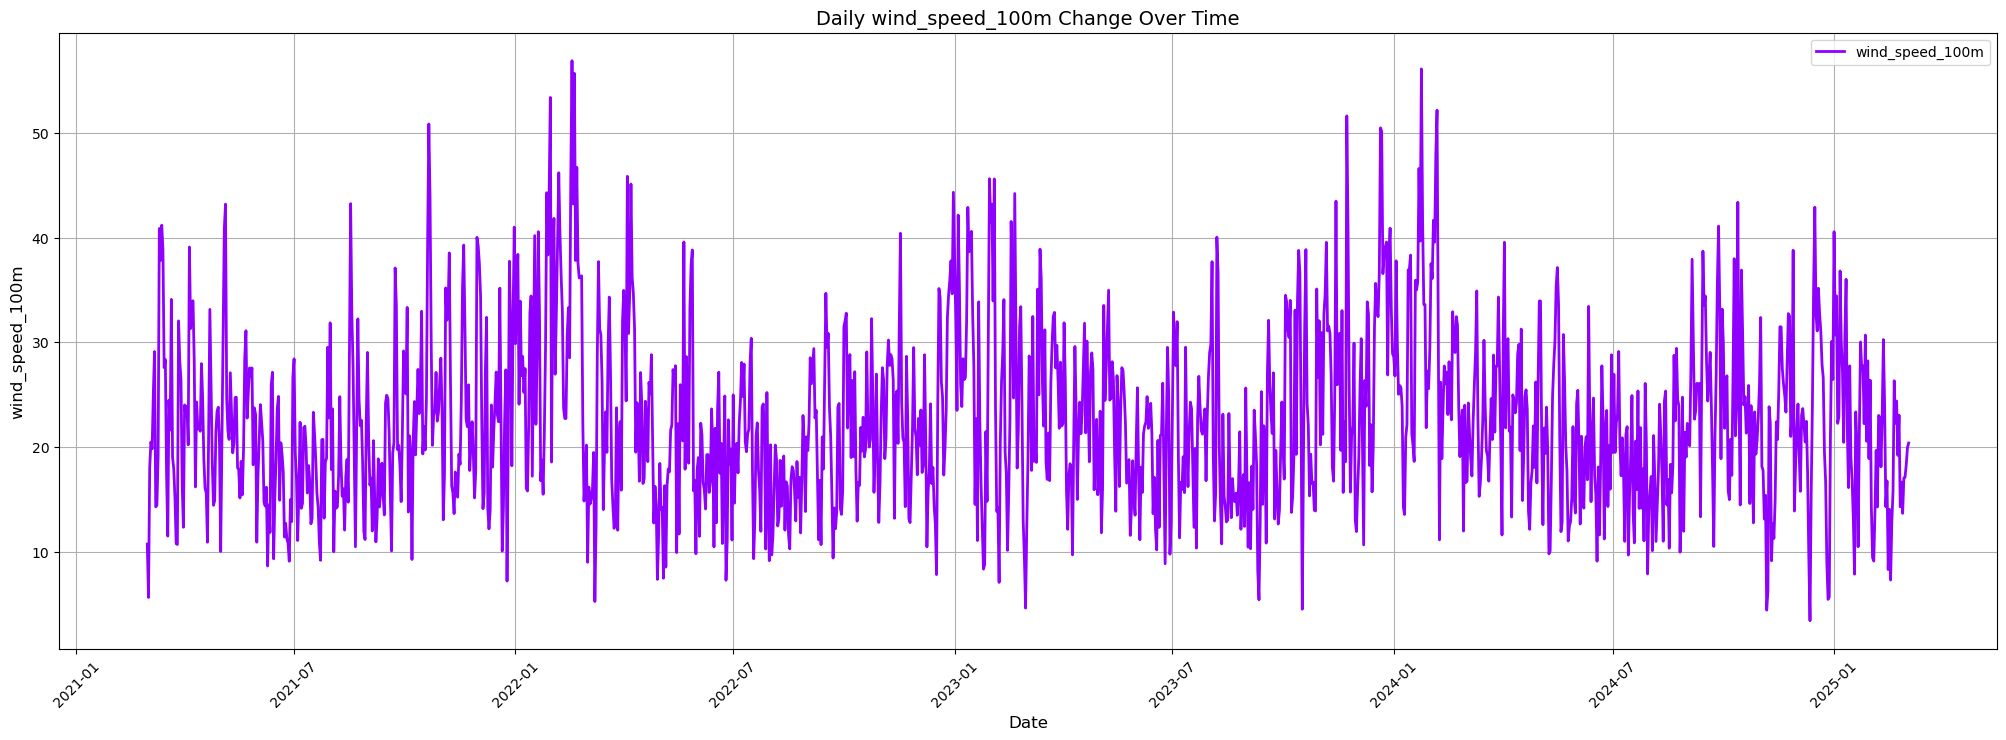

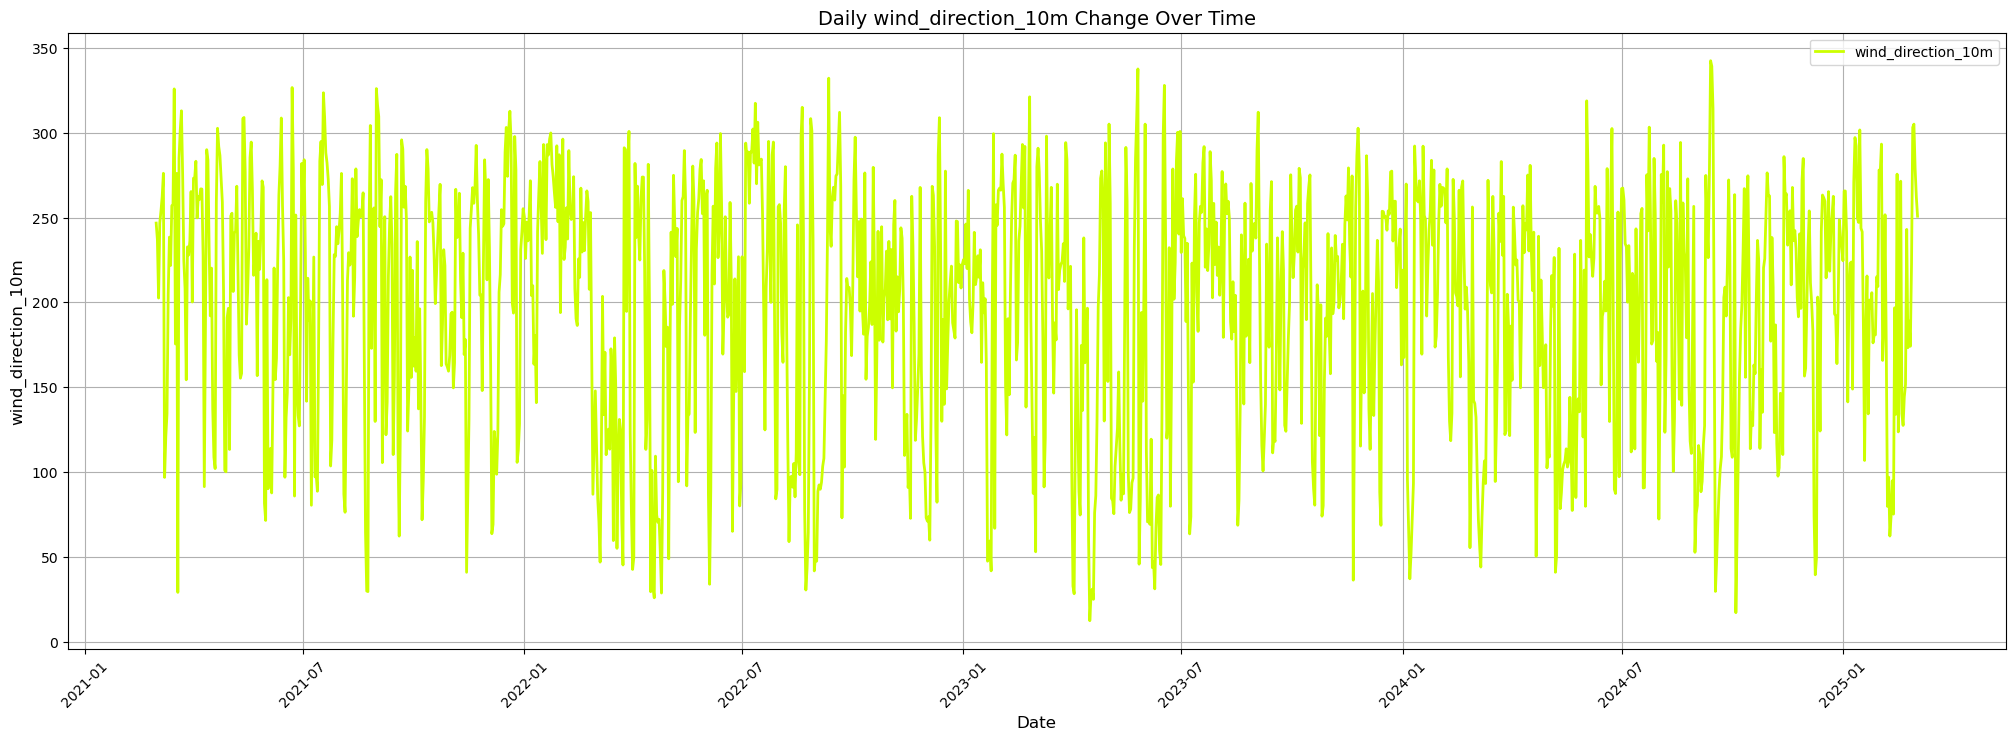

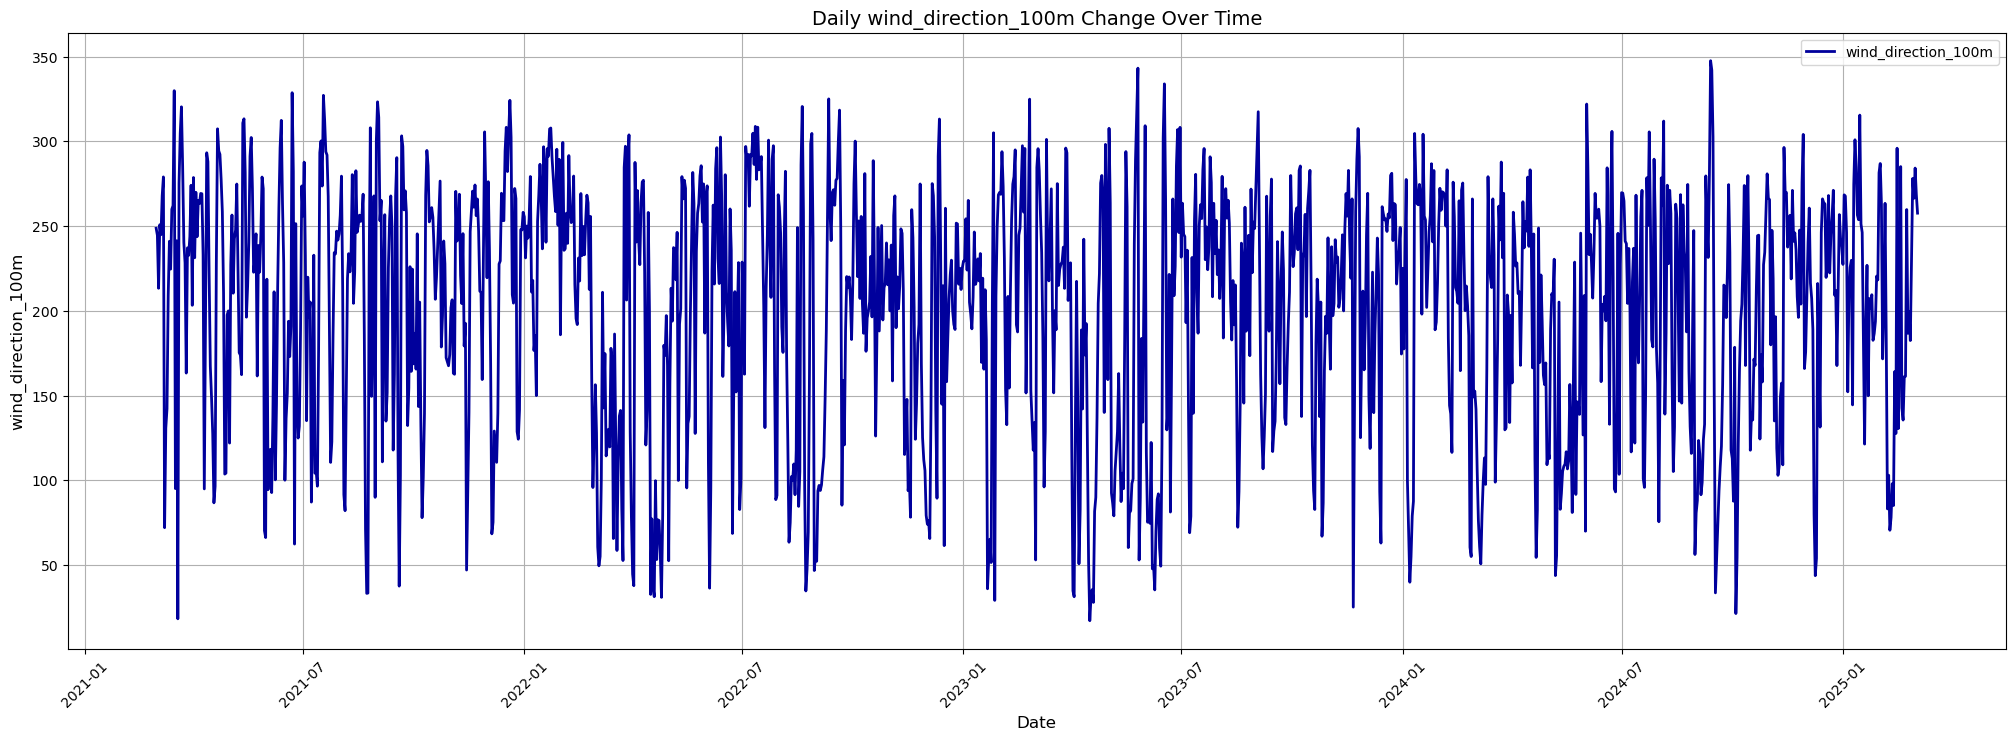

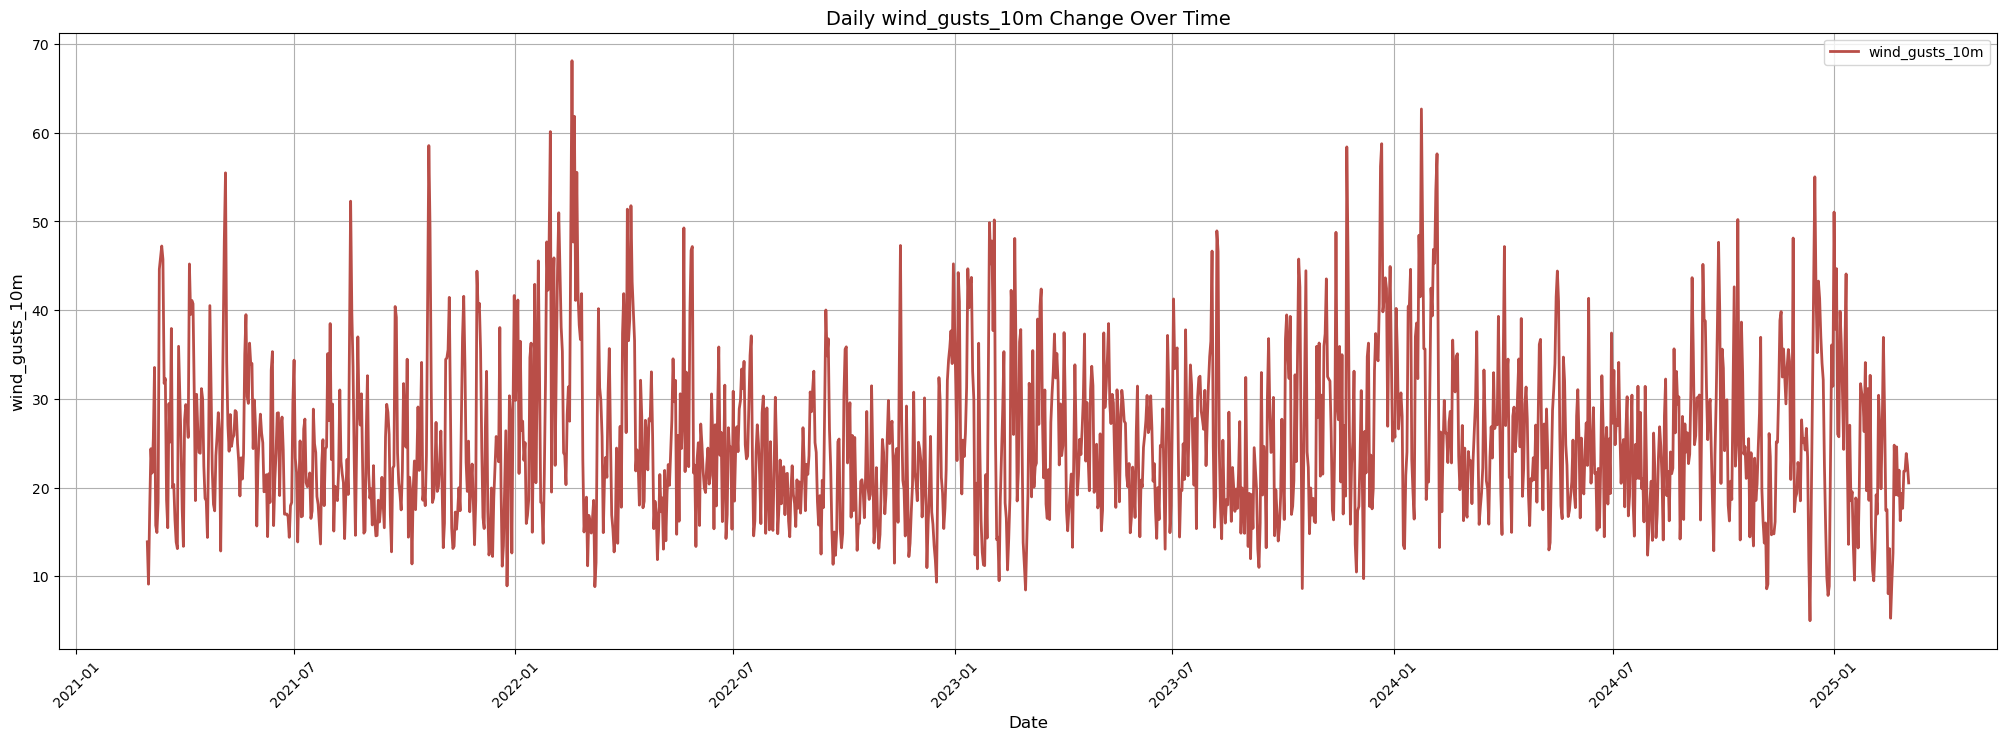

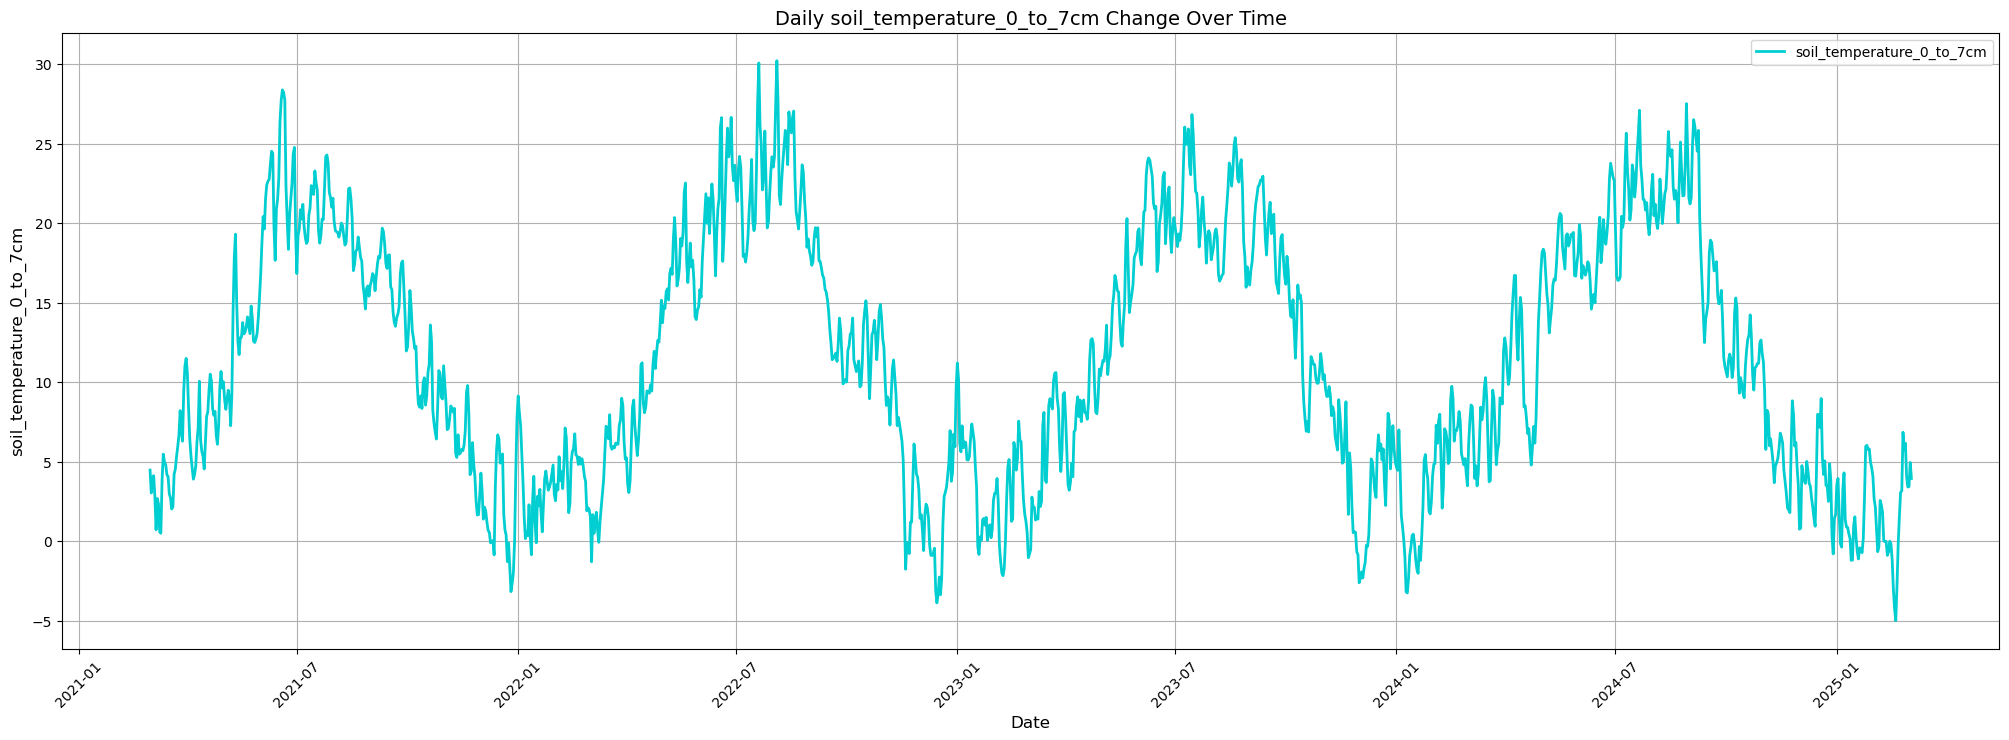

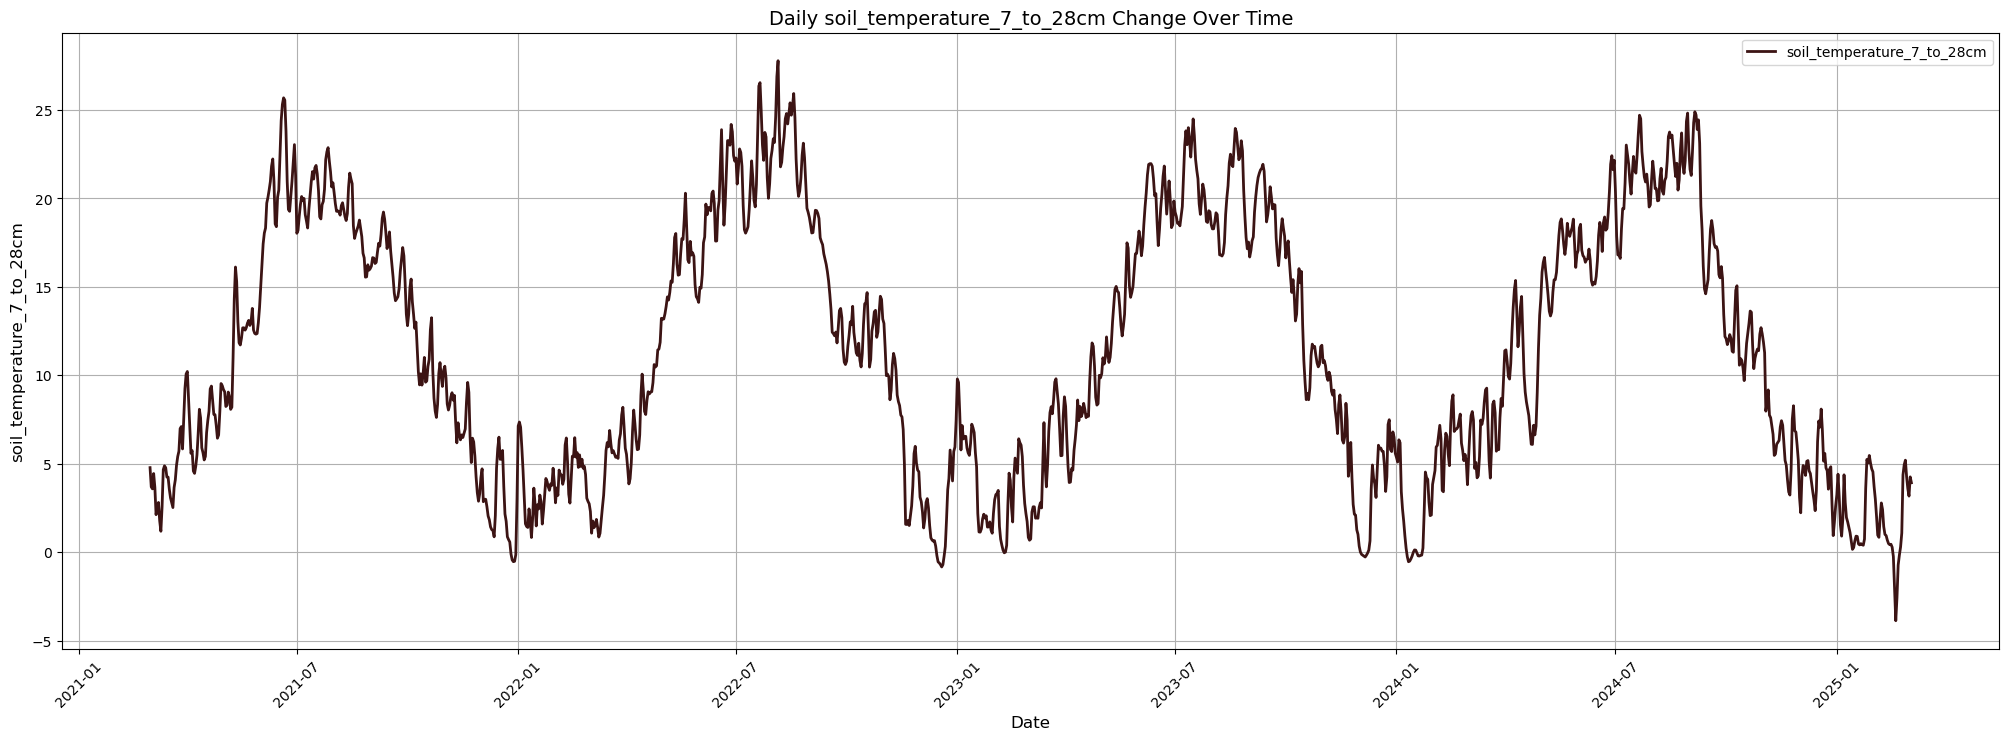

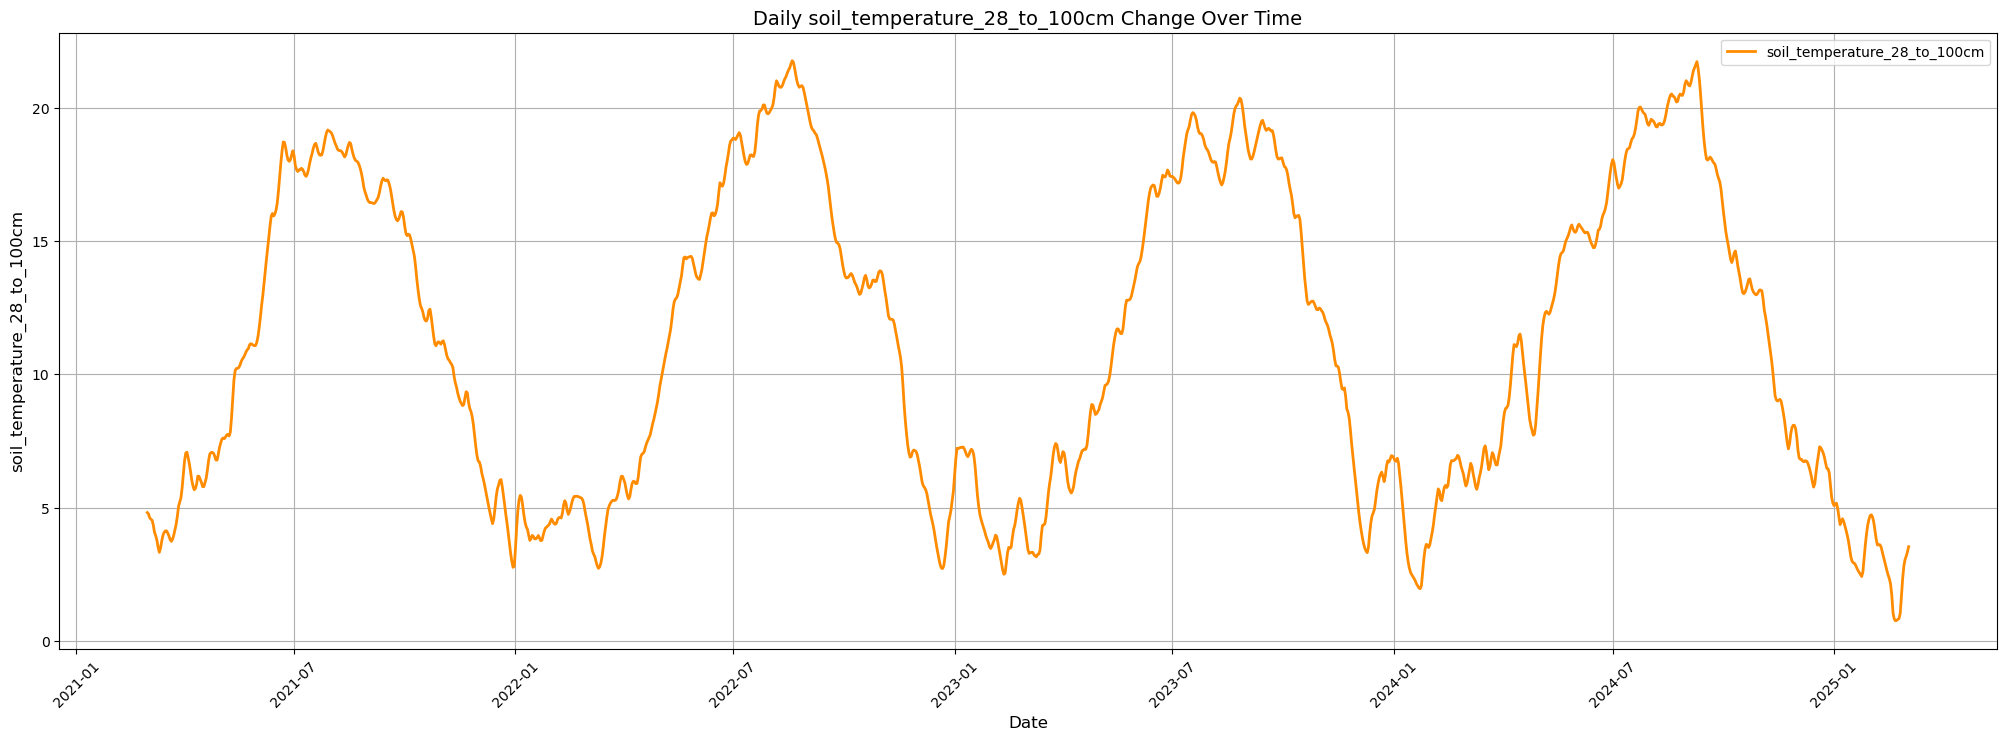

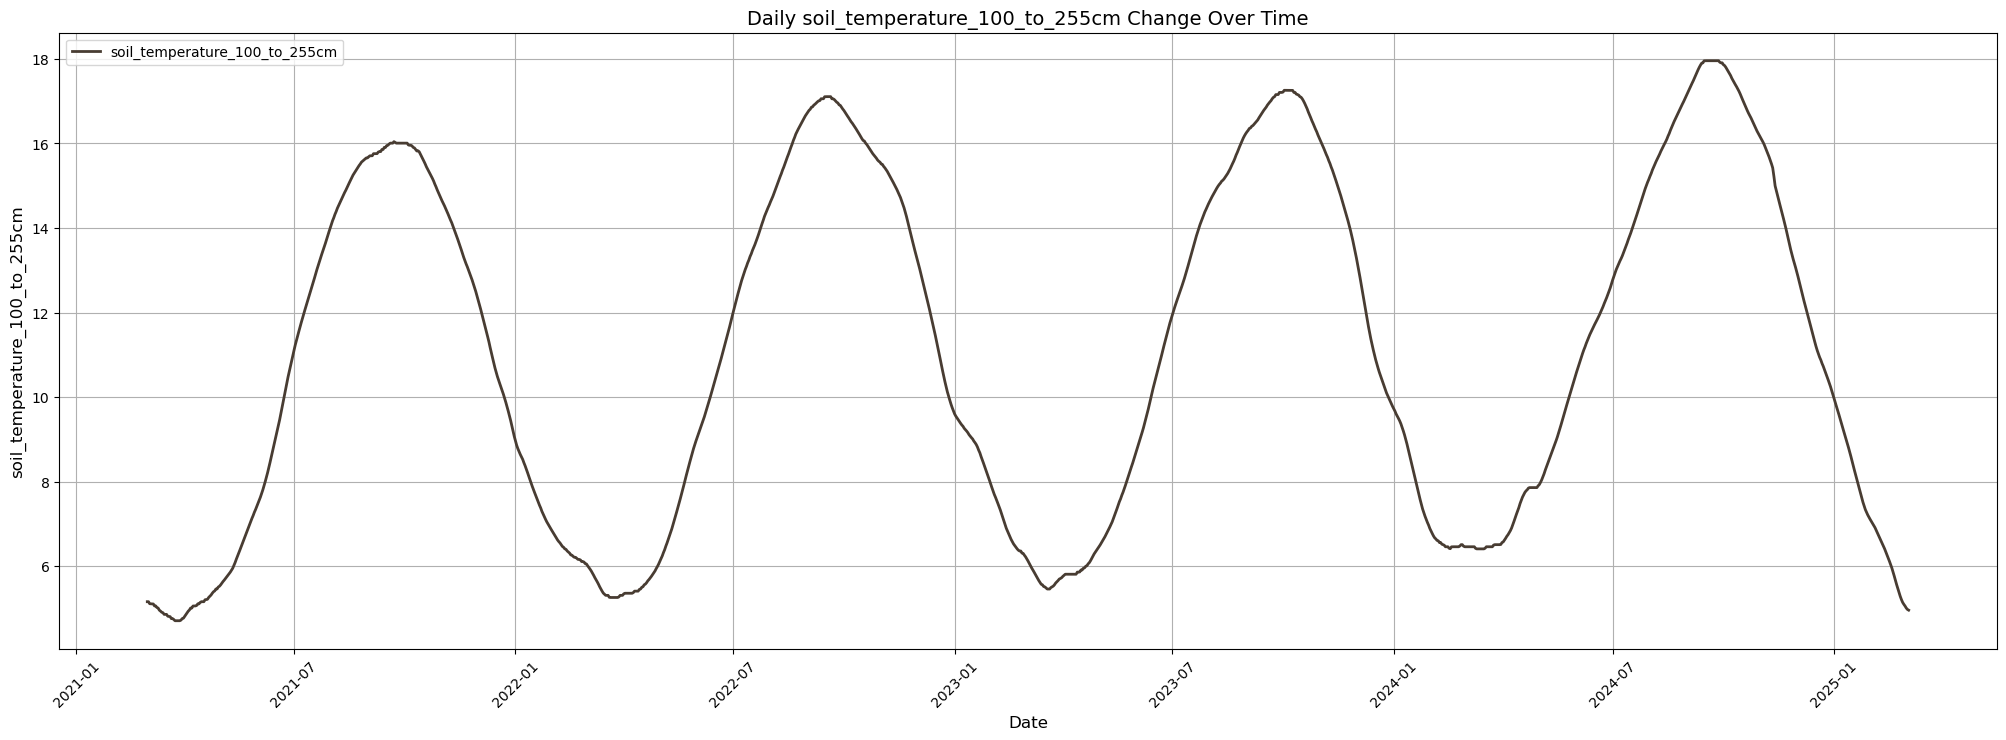

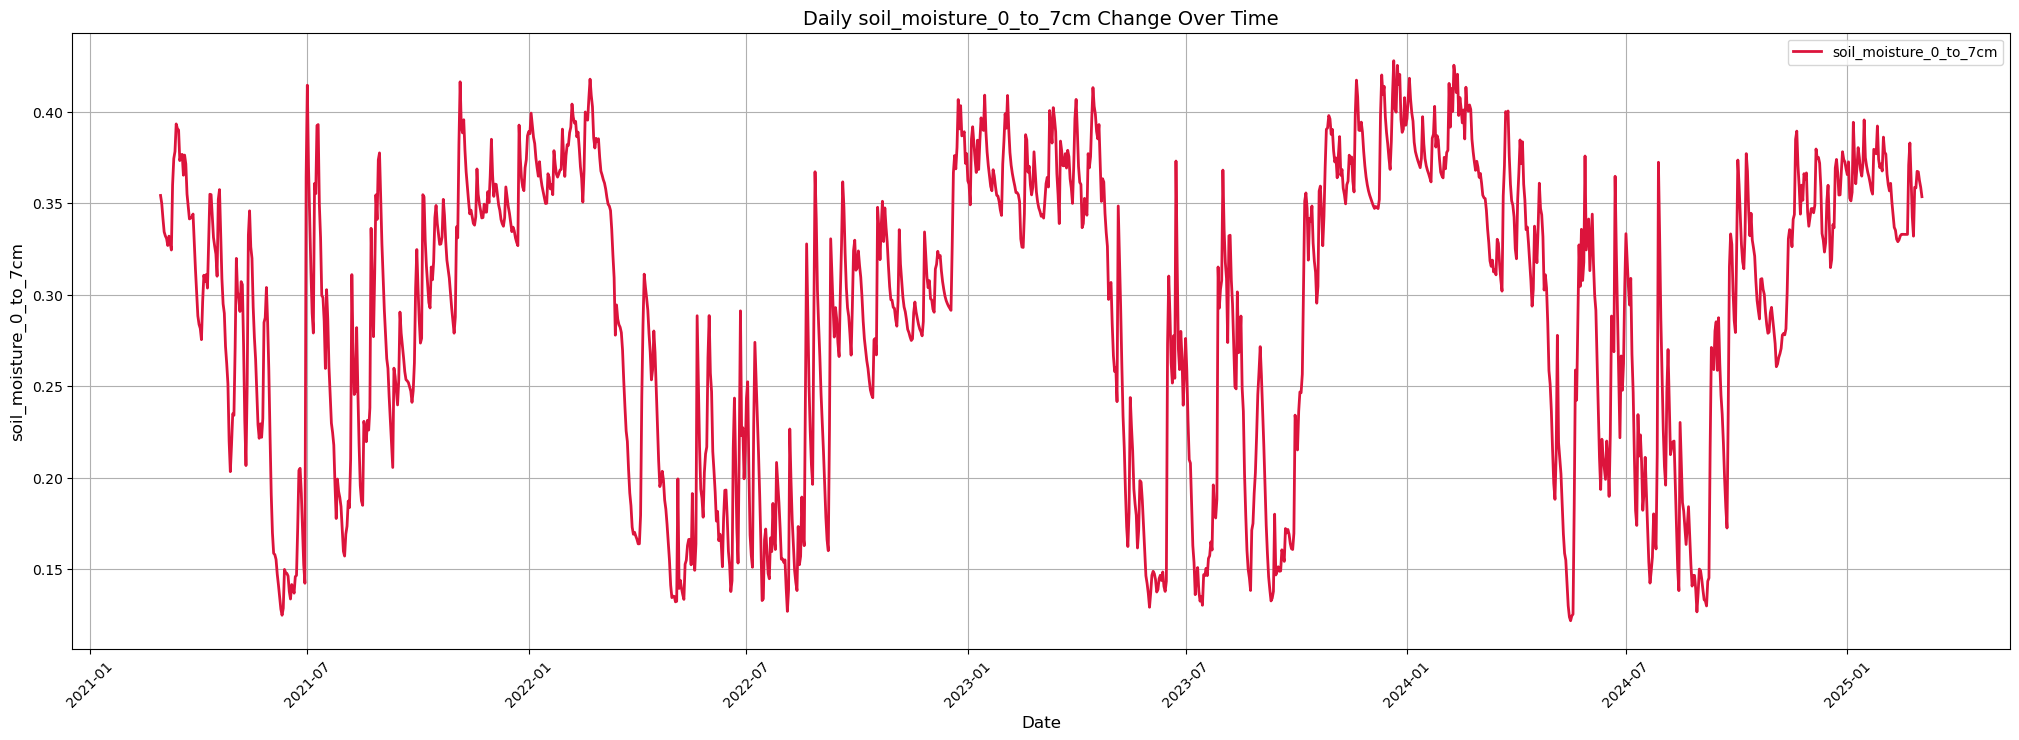

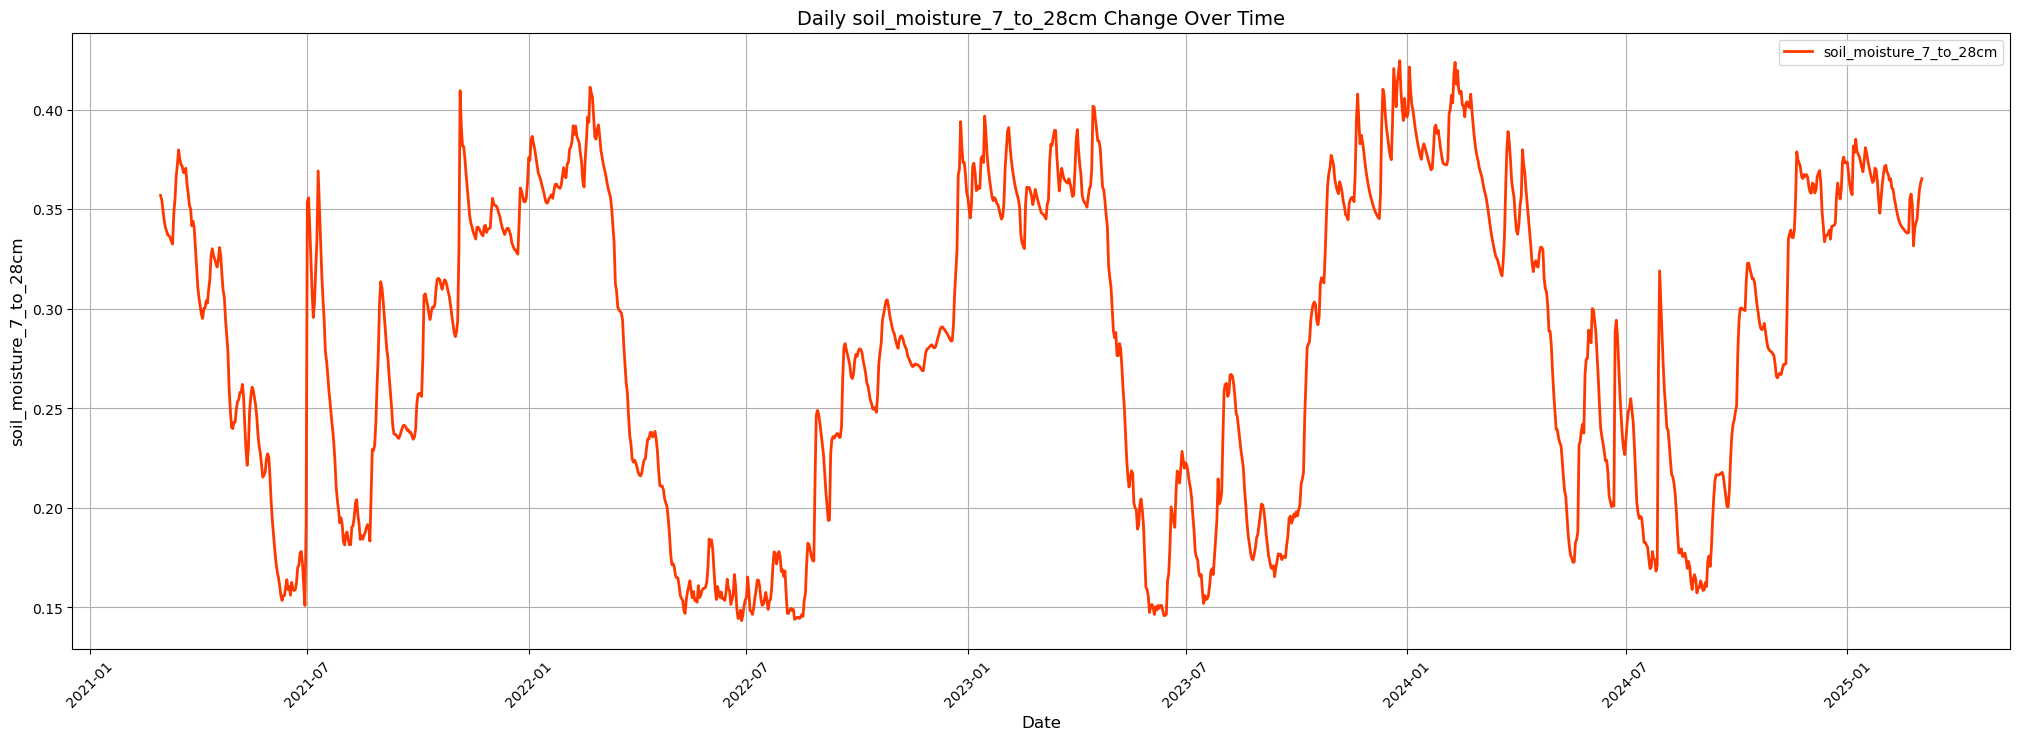

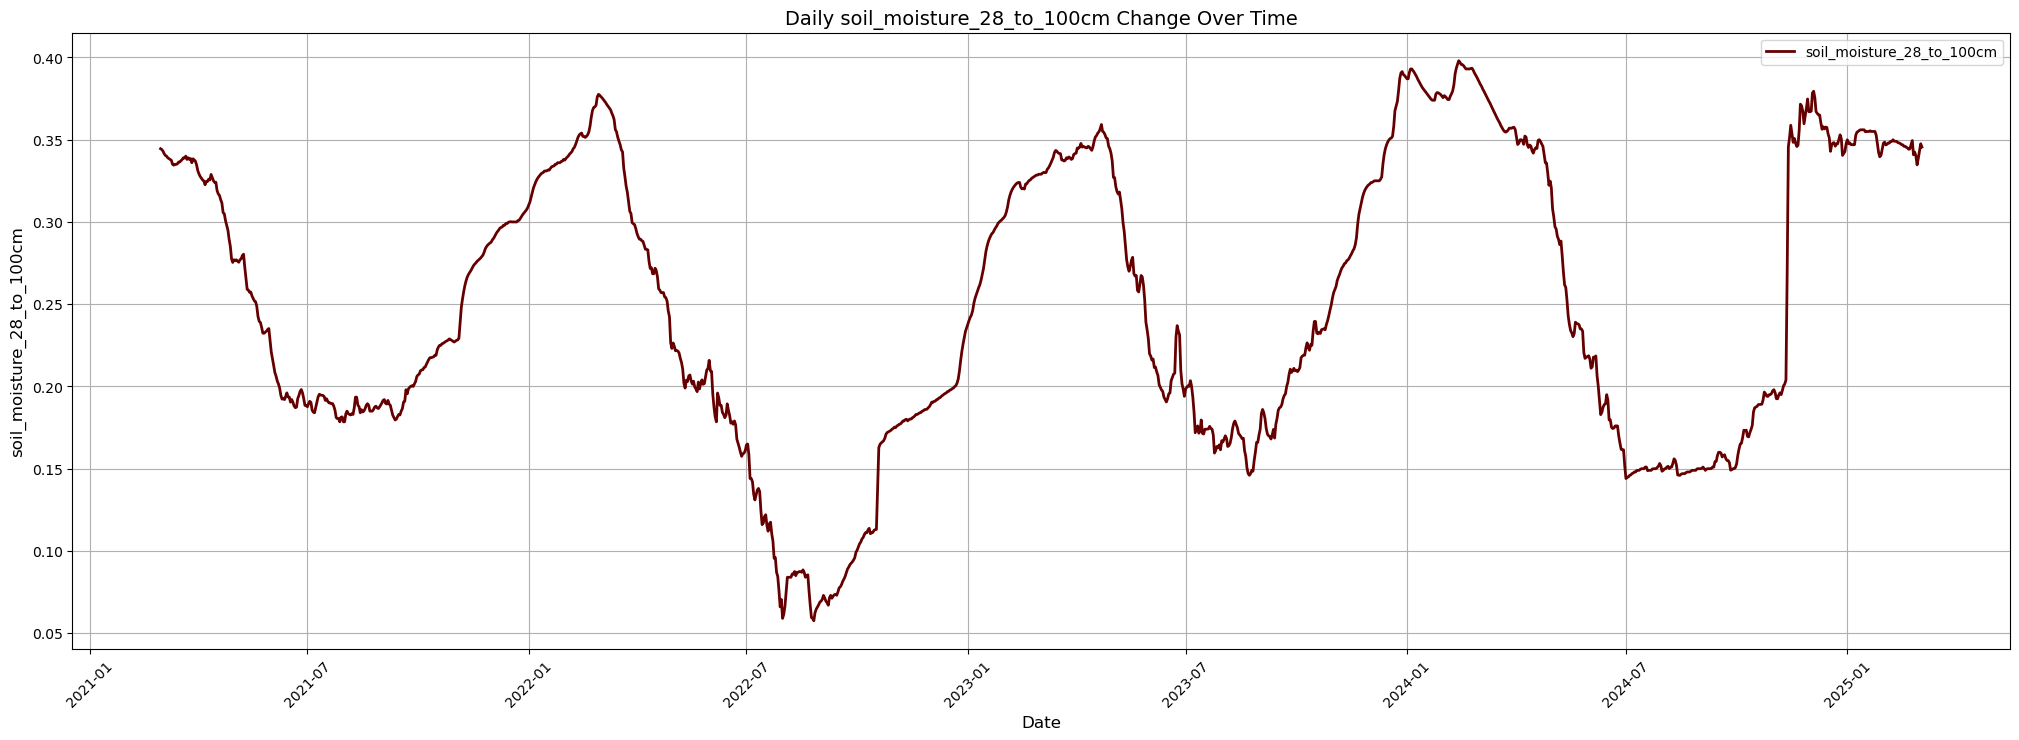

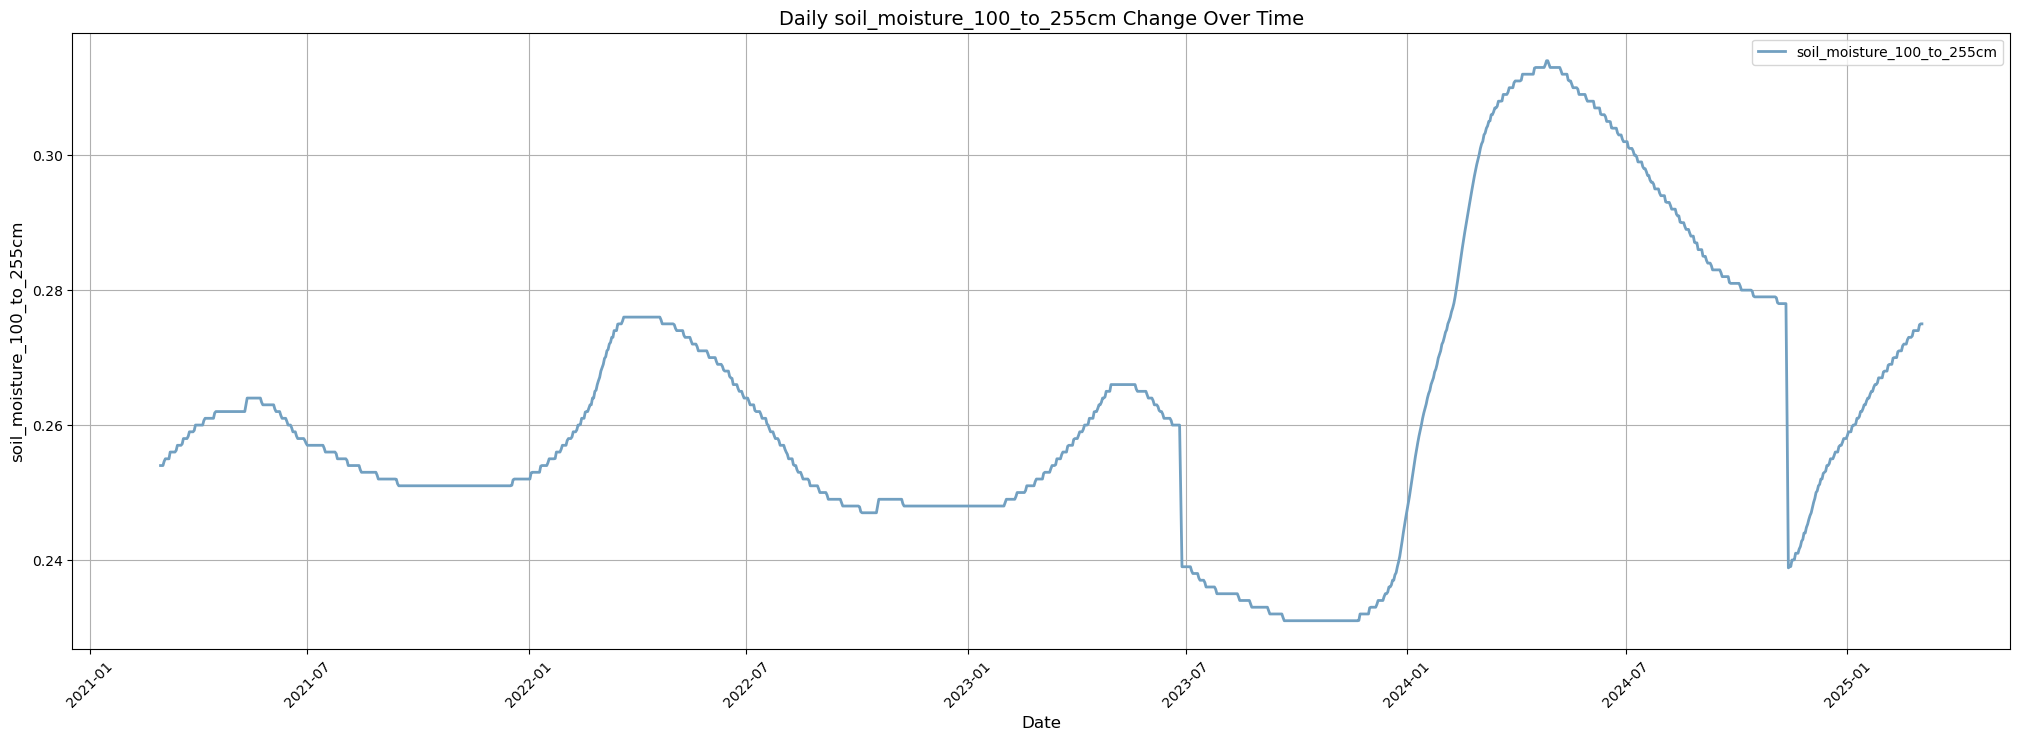

In [ ]:
def line_plot():
    # Define custom colors (Ensuring enough colors for all columns)
    colors = ["#0048BA", "#DB2D43", "#C46210", "#FDEE00", "#2E5894", "#00FFFF", "#FF00FF", "#00FF00", "#0000FF", "#FF0000",
        "#000000", "#004225", "#80FF00", "#FF1493", "#1B1B1B", "#87421f", "#B22222", "#00FF40", "#8F00FF", "#CCFF00",
        "#00009C", "#B94E48", "#00CED1", "#3C1414", "#FF8C00", "#483C32", "#DC143C", "#FF3800", "#660000", "#72A0C1"]

    # Loop over columns and create a separate figure for each variable
    for i, col in enumerate(daily_df.columns):
        plt.figure(figsize=(25, 8))  # Separate figure for each plot
        color = colors[i % len(colors)]  # Assign a unique color for each variable
        plt.plot(daily_df.index, daily_df[col], color=color, label=col, linewidth=2)
        
        # Improve readability
        plt.title(f"Daily {col} Change Over Time", fontsize=14)
        plt.xlabel("Date", fontsize=12)
        plt.ylabel(col, fontsize=12)
        plt.legend()
        plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
        
        plt.show()  # Show each plot separately

# Call the function
line_plot()


### Brief explanation of the plots


### Plotly interactive dashboard
This interactive plot compliments the feature plots above. It allows you to select individual variable plots, and when you hover at any particular point, the `date`,  